# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset comprises information from 17 phone campaigns conducted between May 2008 and November 2010, involving a total of 79,354 contacts. During these campaigns, participants were offered an attractive long-term deposit application with competitive interest rates. For each contact, a wide range of attributes were recorded, along with the outcome indicating whether the offer resulted in a success (the target variable). Across the entire dataset, there were 6,499 successful conversions, yielding an overall success rate of 8%.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [3]:
bank_df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

In [5]:
bank_df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [7]:
#Describe data to understand the data set 
bank_df.shape

(41188, 21)

In [9]:
#Explore data
#Invetsiigate the data and identify the problematic data. 
#Find any null value in the dataset
print(bank_df.isnull().any())

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool


### Looking at the data it is clear that no feature has missing value. So to have better undersatnding of data we will categorize the data.

### Data Categorization

Here’s how the data can be categorized into Client Profile, Marketing Data, and Output Variable:

1. Client Profile (Personal and Socioeconomic Data):
This category includes data that describes the client’s personal attributes, demographic information, and their socioeconomic context.

- 1. Age (numeric) – Age of the client.

- 2. Job (categorical) – Type of job (e.g., 'admin.', 'blue-collar', 'entrepreneur', etc.).

- 3. Marital (categorical) – Marital status (e.g., 'divorced', 'married', 'single', etc.).

- 4. Education (categorical) – Level of education (e.g., 'basic.4y', 'university.degree', etc.).

- 5. Default (categorical) – Whether the client has credit in default ('no', 'yes', 'unknown').

- 6. Housing (categorical) – Whether the client has a housing loan ('no', 'yes', 'unknown').

- 7. Loan (categorical) – Whether the client has a personal loan ('no', 'yes', 'unknown').

2. Marketing Data (Campaign and Contact Information):
This category includes data related to the client’s interactions during the current and previous marketing campaigns.

- 8. Contact (categorical) – Communication type used for contact ('cellular', 'telephone').

- 9. Month (categorical) – Month of the last contact ('jan', 'feb', ..., 'dec').

- 10. Day of Week (categorical) – Day of the week of the last contact ('mon', 'tue', ..., 'fri').

- 11. Duration (numeric) – Duration of the last contact in seconds (Important note: should only be included for benchmarking purposes as it is not available before the call).

- 12. Campaign (numeric) – Number of contacts made during the current campaign for this client (includes the last contact).

- 13. Pdays (numeric) – Number of days since the client was last contacted in a previous campaign (999 means no previous contact).

- 14. Previous (numeric) – Number of contacts made before this campaign for this client.

- 15. Poutcome (categorical) – Outcome of the previous campaign ('failure', 'nonexistent', 'success').

3. Output Variable (Target Variable):
This category includes the desired outcome of the campaign that we aim to predict.

- 21. Y (binary) – Has the client subscribed to a term deposit? ('yes', 'no').

4. Social and Economic Context Data:
This category includes broader economic and social context indicators that might influence campaign success but are not specific to the client.

- 16. Emp.var.rate (numeric) – Employment variation rate (quarterly indicator).

- 17. Cons.price.idx (numeric) – Consumer price index (monthly indicator).

- 18. Cons.conf.idx (numeric) – Consumer confidence index (monthly indicator).

- 19. Euribor3m (numeric) – Euribor 3-month rate (daily indicator).

- 20. Nr.employed (numeric) – Number of employees (quarterly indicator).

Summary of Categories:

- Client Profile: Attributes related to the individual’s personal and socioeconomic information.
- Marketing Data: Attributes related to the client’s interaction in the campaign and previous campaign outcomes.
- Output Variable: The target we aim to predict, i.e., whether the client subscribed to the term deposit.
- Social and Economic Context Data: Broader contextual data that may influence campaign outcomes.

This categorization helps organize the data based on its role in the predictive modeling process and ensures a clearer structure for analyzing the factors contributing to the success of the marketing campaign.





### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [11]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Business Objective
The objective of the task is to develop a predictive model that can effectively explain and predict the likelihood of a successful contact in the context of the phone campaigns. Specifically, the model aims to identify the factors that contribute to a client’s decision to subscribe to the long-term deposit offer. By doing so, it can enhance the overall efficiency of future campaigns. The key benefits of the model include:

1. Identifying Key Success Factors: Understanding the main characteristics or attributes of contacts that significantly influence the likelihood of success (i.e., the client subscribing to the deposit). These factors could include demographic information, previous interactions, or any other relevant data collected during the campaigns.

2. Resource Optimization: Helping to allocate resources more effectively by identifying the high-potential customers. This could lead to a more targeted approach in campaign execution, such as prioritizing contacts with higher probabilities of success, minimizing wasted efforts, and optimizing the use of human resources, phone calls, and time.

3. Improving Campaign Strategy: Enabling better decision-making on which customers to engage with, improving the selection of leads who are more likely to convert. This would result in a more focused, cost-effective approach, potentially increasing the overall success rate of future campaigns.

Ultimately, the goal is to create a model that not only predicts success but also provides actionable insights to maximize the efficiency and return on investment of the phone campaigns.

### EDA (Exploratory Data Analysis) - Numerical data

In [13]:
# Identify each numeric data range
bank_df.describe().loc[['min', 'max']]

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
min  17.0       0.0       1.0    0.0       0.0          -3.4          92.201   
max  98.0    4918.0      56.0  999.0       7.0           1.4          94.767   

     cons.conf.idx  euribor3m  nr.employed  
min          -50.8      0.634       4963.6  
max          -26.9      5.045       5228.1

If the values for emp.var.rate (employment variation rate) and cons.price.idx (consumer price index) have negative values, it's important to interpret them correctly, as these are indicators of economic trends.

Here’s what the negative values represent:

**1. Emp.var.rate (Employment Variation Rate)**

Interpretation of Negative Values:

This variable measures the quarterly change in employment. A negative value indicates a decrease in employment or a decline in the number of employed individuals in that quarter.

For example, if emp.var.rate = -3.4, it means that employment has decreased by 3.4% in that quarter.

**2. Cons.price.idx (Consumer Price Index)**

Interpretation of Negative Values:

The consumer price index (CPI) measures the average change in prices paid by consumers for goods and services. A negative value suggests a deflationary trend, meaning that overall prices are decreasing.

For example, if cons.price.idx = -50.8, this suggests that the consumer price index dropped by 50.8 points compared to the previous period.This could indicate a drastic decline in prices (deflation), often caused by a significant reduction in demand, a financial crisis, or other extreme economic conditions.

**Why Negative Values Occur?**
    
- Economic Downturn: Both of these indicators can be negative during periods of economic recession or downturn, reflecting issues like rising unemployment and declining prices.

- Deflation: A negative CPI (consumer price index) could signal deflation, which can happen during economic recessions when there is reduced demand for goods and services, leading to lower prices.

**How to Handle Negative Values in Our Model?**

- No Action Needed if Interpreted Correctly: If these negative values are correctly understood as indicators of economic conditions, they can be used directly in the model to represent their economic meaning.

- Feature Scaling: Depending on the algorithm we're using, it might be beneficial to normalize or standardize these variables to ensure that they have a similar scale to the other features in the dataset. For example, using z-scores or Min-Max scaling can help the model handle both negative and positive values appropriately.

- Contextual Importance: Keep in mind that negative values in these features could indicate important patterns in the data, such as economic conditions influencing customer behavior. Including them can improve the model’s ability to predict client behavior in different economic environments.

**Conclusion**
Negative values in emp.var.rate and cons.price.idx are not inherently problematic. They simply reflect economic conditions such as employment declines or price deflation. As long as we understand their implications, these negative values can be incorporated into the model to help identify patterns and trends related to campaign success.

### EDA (Exploratory Data Analysis) - Categorical data

In [15]:
# Identify each categorical data range
bank_categorical_data = bank_df.select_dtypes(include = 'object').copy()
bank_categorical_data.head(2)

job  marital    education  default housing loan    contact month  \
0  housemaid  married     basic.4y       no      no   no  telephone   may   
1   services  married  high.school  unknown      no   no  telephone   may   

  day_of_week     poutcome   y  
0         mon  nonexistent  no  
1         mon  nonexistent  no

### Basic State of each feature in categorical data. 

In [17]:
### Look at the different values of distinct categories in our variable. This method will list down any missing values (nan) as well
print(bank_categorical_data['job'].unique())
print(bank_categorical_data['marital'].unique())
print(bank_categorical_data['education'].unique())
print(bank_categorical_data['default'].unique())
print(bank_categorical_data['housing'].unique())
print(bank_categorical_data['loan'].unique())
print(bank_categorical_data['contact'].unique())
print(bank_categorical_data['month'].unique())
print(bank_categorical_data['day_of_week'].unique())
print(bank_categorical_data['poutcome'].unique())
print(bank_categorical_data['y'].unique())

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'unknown' 'yes']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']
['nonexistent' 'failure' 'success']
['no' 'yes']


In [19]:
### Count of distinct categories in our variable. Here we have counted nan values also (if any)
len(bank_categorical_data['job'].unique())

12

### Frequency Distribution

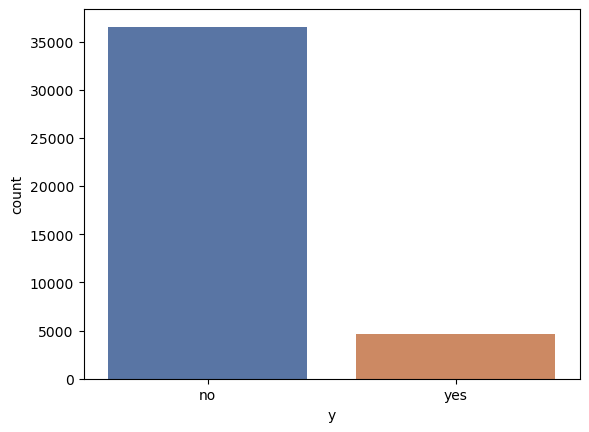

y
no     36548
yes     4640
Name: count, dtype: int64

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='y', data=bank_df, hue='y', palette='deep', legend=False)
plt.show()
bank_categorical_data['y'].value_counts()

The column Y is a categorical column that define the client subscription status. From the plot, we can find that number of client subscribed for term deposit is lesser. 

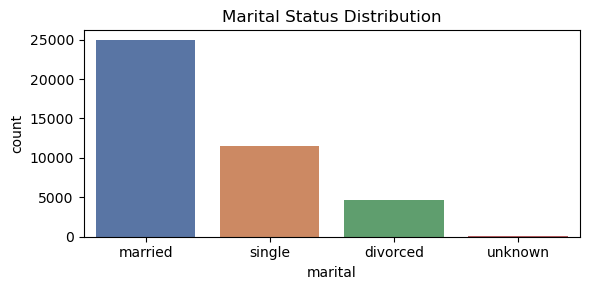

In [23]:
plt.figure(figsize=(6, 3))
sns.countplot(data=bank_df, x='marital', order =bank_df['marital'].value_counts().index, hue='marital', palette='deep', legend=False)
plt.title('Marital Status Distribution')
plt.tight_layout()
plt.show()

Looking at the martial status distribution, 
it is identified that count of unknown martial status is very less in the data and have minimal effect so it seems safe to remove rows with 'unknown' martial status.

In [25]:
# Remove rows where the 'marital' column is equal to unknown
bank_df = bank_df[bank_df['marital'] != 'unknown']


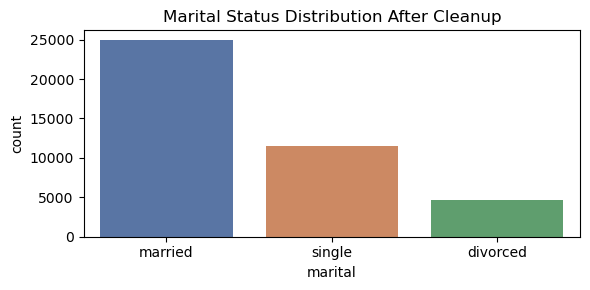

In [27]:
plt.figure(figsize=(6, 3))
sns.countplot(data=bank_df, x='marital', order =bank_df['marital'].value_counts().index, hue='marital', palette='deep', legend=False)
plt.title('Marital Status Distribution After Cleanup')
plt.tight_layout()
plt.show()

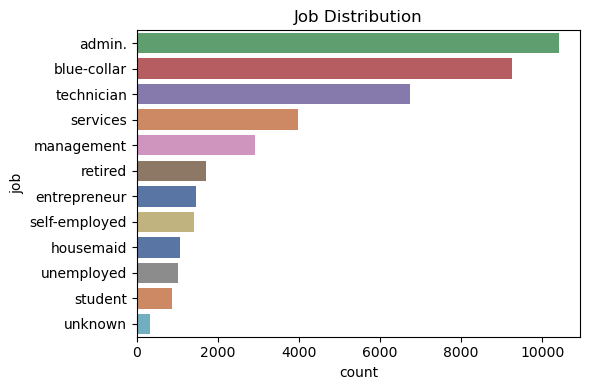

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(data=bank_df, y='job', order = bank_df['job'].value_counts().index, hue='job', palette='deep', legend=False )
plt.title('Job Distribution')
plt.tight_layout()
plt.show()

Looking at the Job Distribution, it is identified that count of unknown job is very less in the data and have minimal effect so it seems safe to remove rows with 'unknown' job.

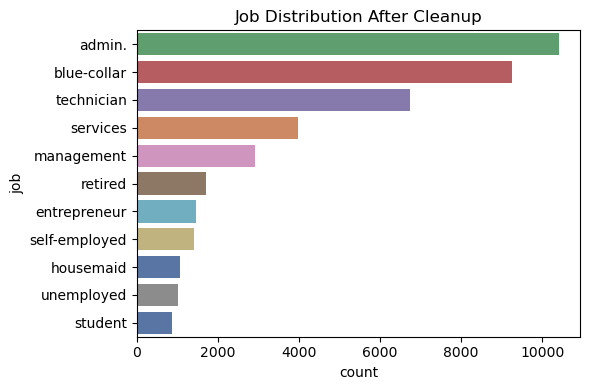

In [31]:
bank_df = bank_df[bank_df['job'] != 'unknown']
plt.figure(figsize=(6,4))
sns.countplot(data=bank_df, y='job', order = bank_df['job'].value_counts().index, hue='job', palette='deep', legend=False )
plt.title('Job Distribution After Cleanup')
plt.tight_layout()
plt.show()

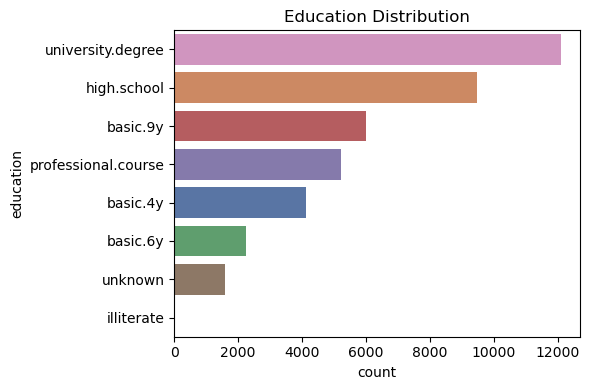

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(data=bank_df, y='education', order = bank_df['education'].value_counts().index, hue='education', palette='deep', legend=False )
plt.title('Education Distribution')
plt.tight_layout()
plt.show()

Looking at the education distribution graph, we can identified that count of unknown eductaion data in the complete dataset is less. Though the count of illiterate rows are lesser but removing the unknown education is seems safer to delete to have clean dataset for building model.  

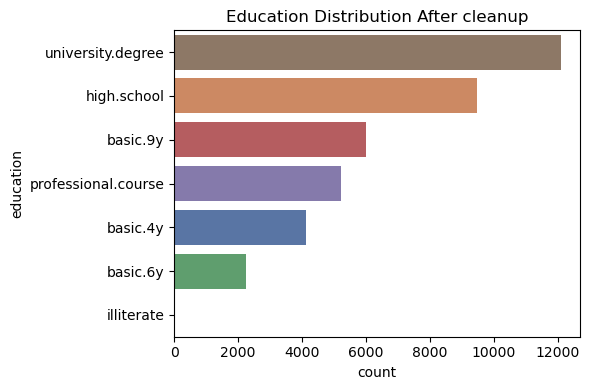

In [35]:
bank_df = bank_df[bank_df['education'] != 'unknown']
plt.figure(figsize=(6,4))
sns.countplot(data=bank_df, y='education', order = bank_df['education'].value_counts().index, hue='education', palette='deep', legend=False )
plt.title('Education Distribution After cleanup')
plt.tight_layout()
plt.show()

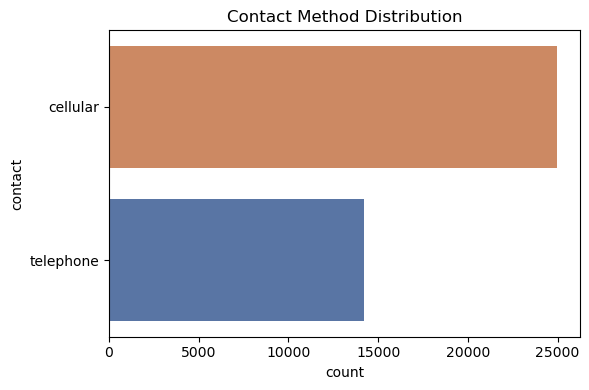

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(data=bank_df, y='contact', order=bank_df['contact'].value_counts().index, hue='contact', palette='deep', legend=False )
plt.title('Contact Method Distribution')
plt.tight_layout()
plt.show()

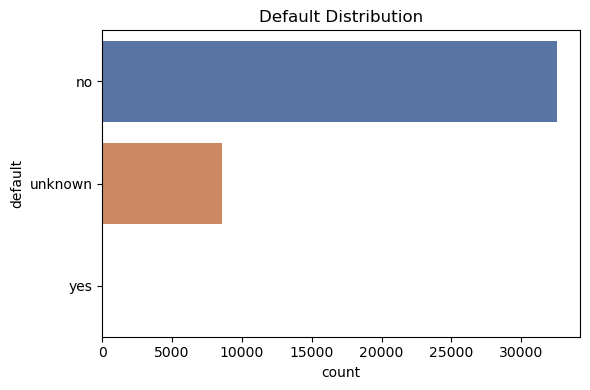

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(data=bank_categorical_data, y='default',order=bank_df['default'].value_counts().index, hue='default', palette='deep', legend=False )
plt.title('Default Distribution')
plt.tight_layout()
plt.show()

Looking Default Distribution graph, we can find that the count of unknown status of client with credit is higher than client with credits. So we will not delete the unknown default values. 

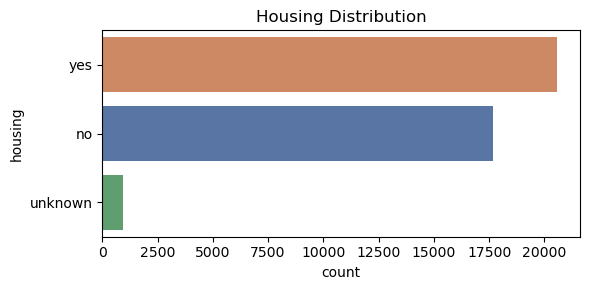

In [41]:
plt.figure(figsize=(6,3))
sns.countplot(data=bank_df, y='housing',order=bank_df['housing'].value_counts().index, hue='housing', palette='deep', legend=False )
plt.title('Housing Distribution')
plt.tight_layout()
plt.show()

The Housing Distribution graph shows that the number of clients with an unknown housing loan status is minimal. Therefore, we can ignore this value to gain a clearer understanding of clients with and without a housing loan.

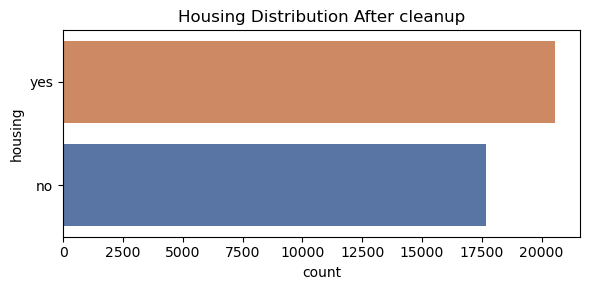

In [43]:
bank_df = bank_df[bank_df['housing'] != 'unknown']
plt.figure(figsize=(6,3))
sns.countplot(data=bank_df, y='housing',order=bank_df['housing'].value_counts().index, hue='housing', palette='deep', legend=False )
plt.title('Housing Distribution After cleanup')
plt.tight_layout()
plt.show()

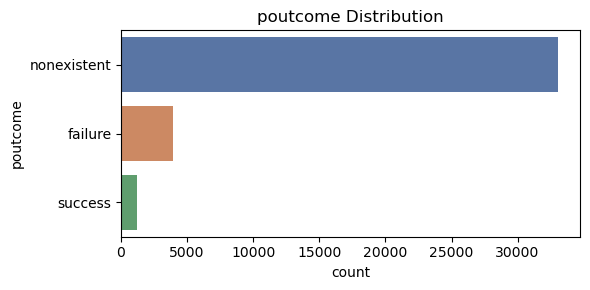

In [45]:
plt.figure(figsize=(6, 3))
sns.countplot(data=bank_df, y='poutcome',order=bank_df['poutcome'].value_counts().index, hue='poutcome', palette='deep', legend=False )
plt.title('poutcome Distribution')
plt.tight_layout()
plt.show()

The outcome of previous campaigns plays a crucial role in bank marketing by providing valuable insights into customer preferences, behaviors, and the effectiveness of past strategies. Analyzing past campaign outcomes helps banks identify what worked well and what didn't, allowing them to refine their marketing strategies, optimize customer targeting, and improve engagement in future campaigns. It also enables banks to personalize their offerings based on customer feedback and responses, leading to better conversion rates and stronger customer relationships.

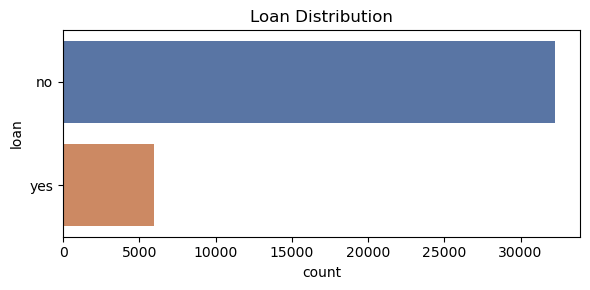

In [47]:
plt.figure(figsize=(6, 3))
sns.countplot(data=bank_df, y='loan',order=bank_df['loan'].value_counts().index, hue='loan', palette='deep', legend=False )
plt.title('Loan Distribution')
plt.tight_layout()
plt.show()

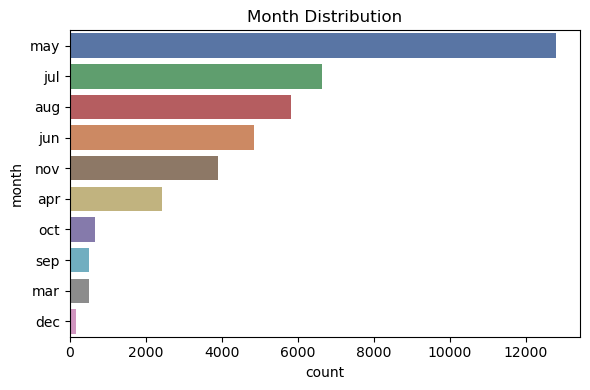

In [51]:
plt.figure(figsize=(6, 4))
sns.countplot(data=bank_df, y='month',order=bank_df['month'].value_counts().index, hue='month', palette='deep', legend=False )
plt.title('Month Distribution')
plt.tight_layout()
plt.show()

The count plot for 'month' illustrates when clients were last contacted in relation to the current marketing campaign. Months like May, July, and August show notably higher contact frequencies compared to September, March, and December, which can inform and guide future marketing strategies.

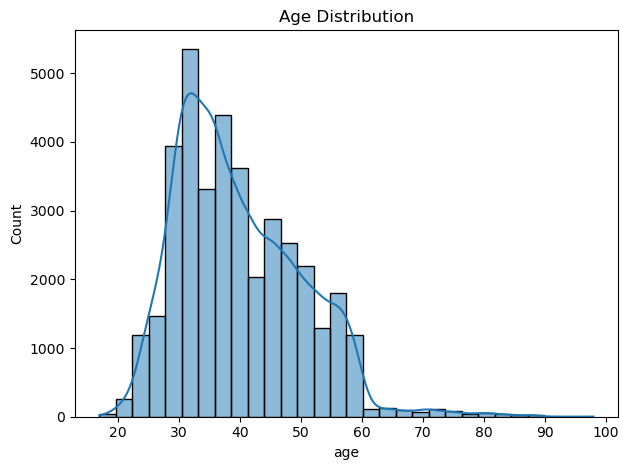

In [53]:
sns.histplot(bank_df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.tight_layout()
plt.show()

The histogram with a kernel density estimate (KDE) displays the age distribution of clients. The distribution is right-skewed, suggesting that clients aged between 25 and 60 are more prevalent compared to older age groups.

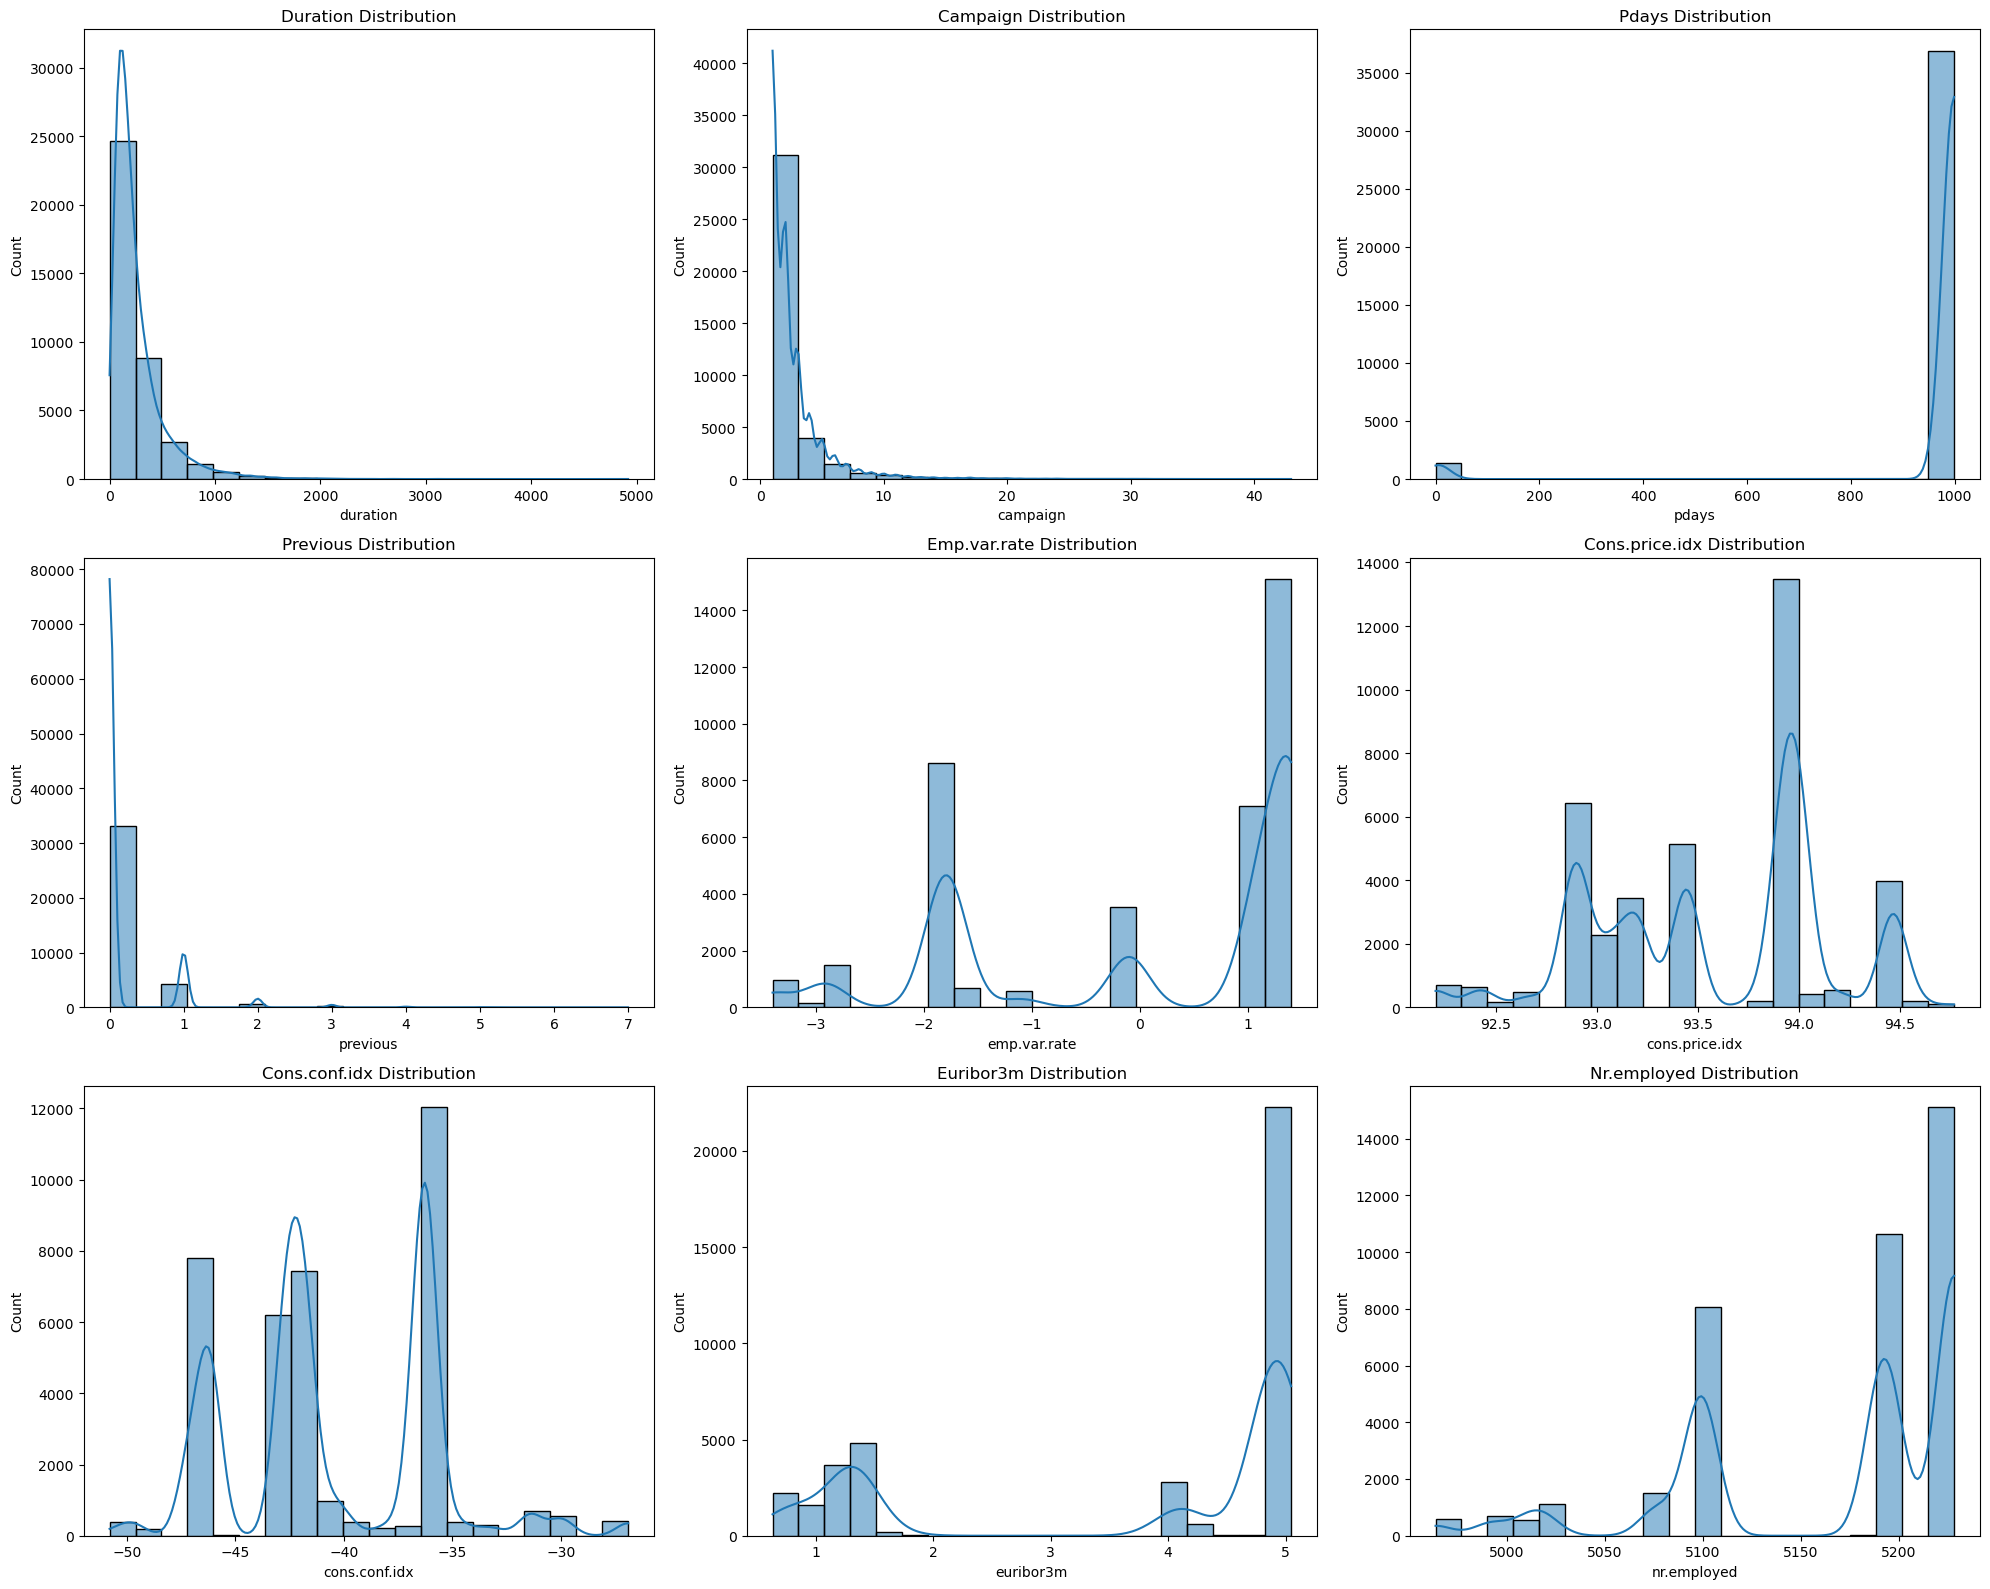

In [55]:
features = ['duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

plt.figure(figsize=(20, 16))

for i, feature in enumerate(features, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(bank_df[feature], bins=20, kde=True)
    plt.title(f'{feature.capitalize()} Distribution')

plt.tight_layout()
plt.show()

- Duration Distribution: Represents the contact duration with clients
- Campaign Distribution: Indicates the number of contacts performed during this campaign for each client.
- Previous Distribution: Reflects the number of contacts before the campaign with an each client.
- Pdays Distribution: Shows the number of days passed by, after the client was last contacted from a previous campaign.
- Emp.var.rate Distribution – Shows Employment variation rate (quarterly indicator).
- Cons.price.idx Distribution – Shows Consumer price index (monthly indicator).
- Cons.conf.idx Distribution – Shows Consumer confidence index (monthly indicator).
- Euribor3m Distribution – Shows Euribor 3-month rate (daily indicator).
- Nr.employed Distribution – Shows Number of employees (quarterly indicator).

### Bivariate Analysis

Bivariate Analysis is a statistical technique used to explore the relationship between two variables. It helps in understanding how one variable impacts or correlates with another. This type of analysis is essential for identifying patterns, trends, or associations between the variables, which can inform decision-making and strategy development

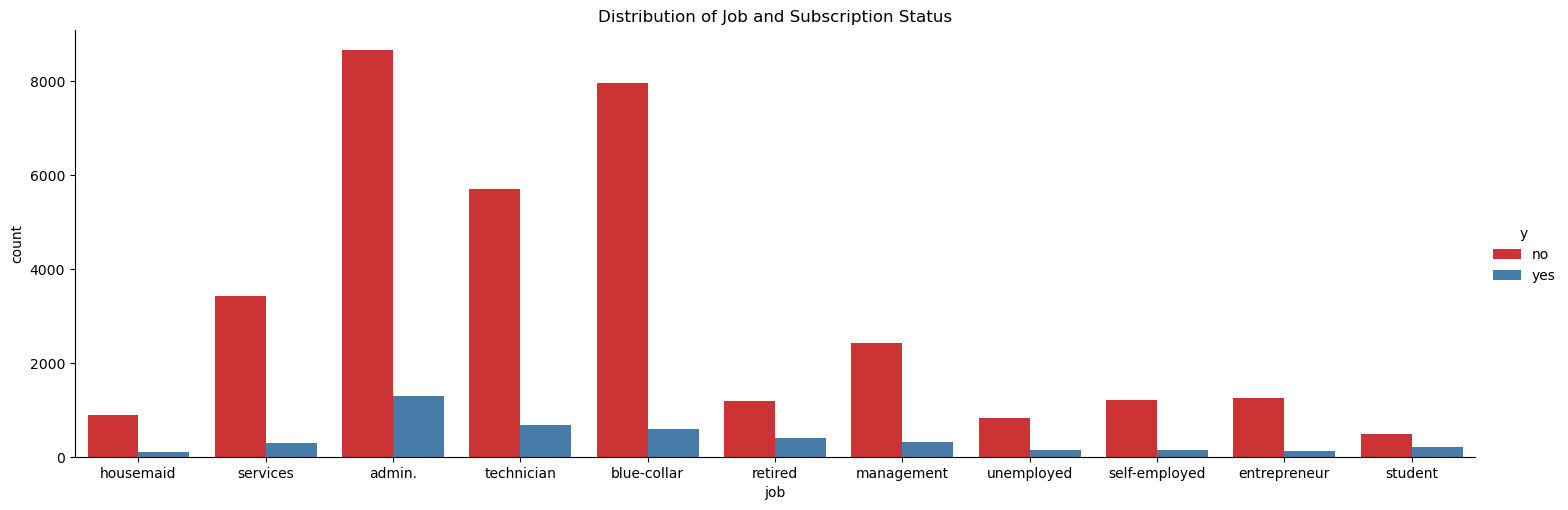

In [57]:
sns.catplot(x='job', hue='y', data=bank_df, kind='count', palette='Set1', aspect=3)
plt.title('Distribution of Job and Subscription Status')
plt.show()

The categorical plot shows the number of clients contacted within each job category, segmented by their subscription status to a term deposit. Jobs in admin, blue-collar, and technician sectors exhibit a higher subscription rate compared to other categories.

<Figure size 2000x1000 with 0 Axes>

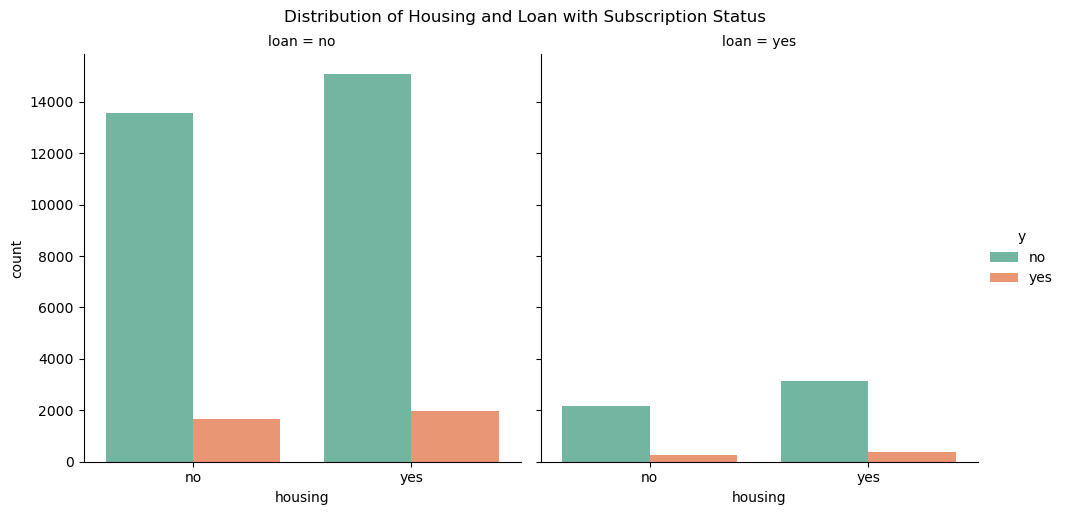

In [59]:
plt.figure(figsize=(20, 10))
sns.catplot(x='housing', hue='y', col='loan', data=bank_df, kind='count', palette='Set2', col_wrap=2)
plt.suptitle('Distribution of Housing and Loan with Subscription Status', y=1.02)
plt.show()

The plot displays the distribution of clients' housing and loan status, segmented into two groups: clients with personal loans and clients without. The data reveals that the number of clients without term deposit subscriptions ('No') exceeds those with subscriptions ('Yes'), highlighting a greater prevalence of 'No' subscriptions in relation to housing and loan status.

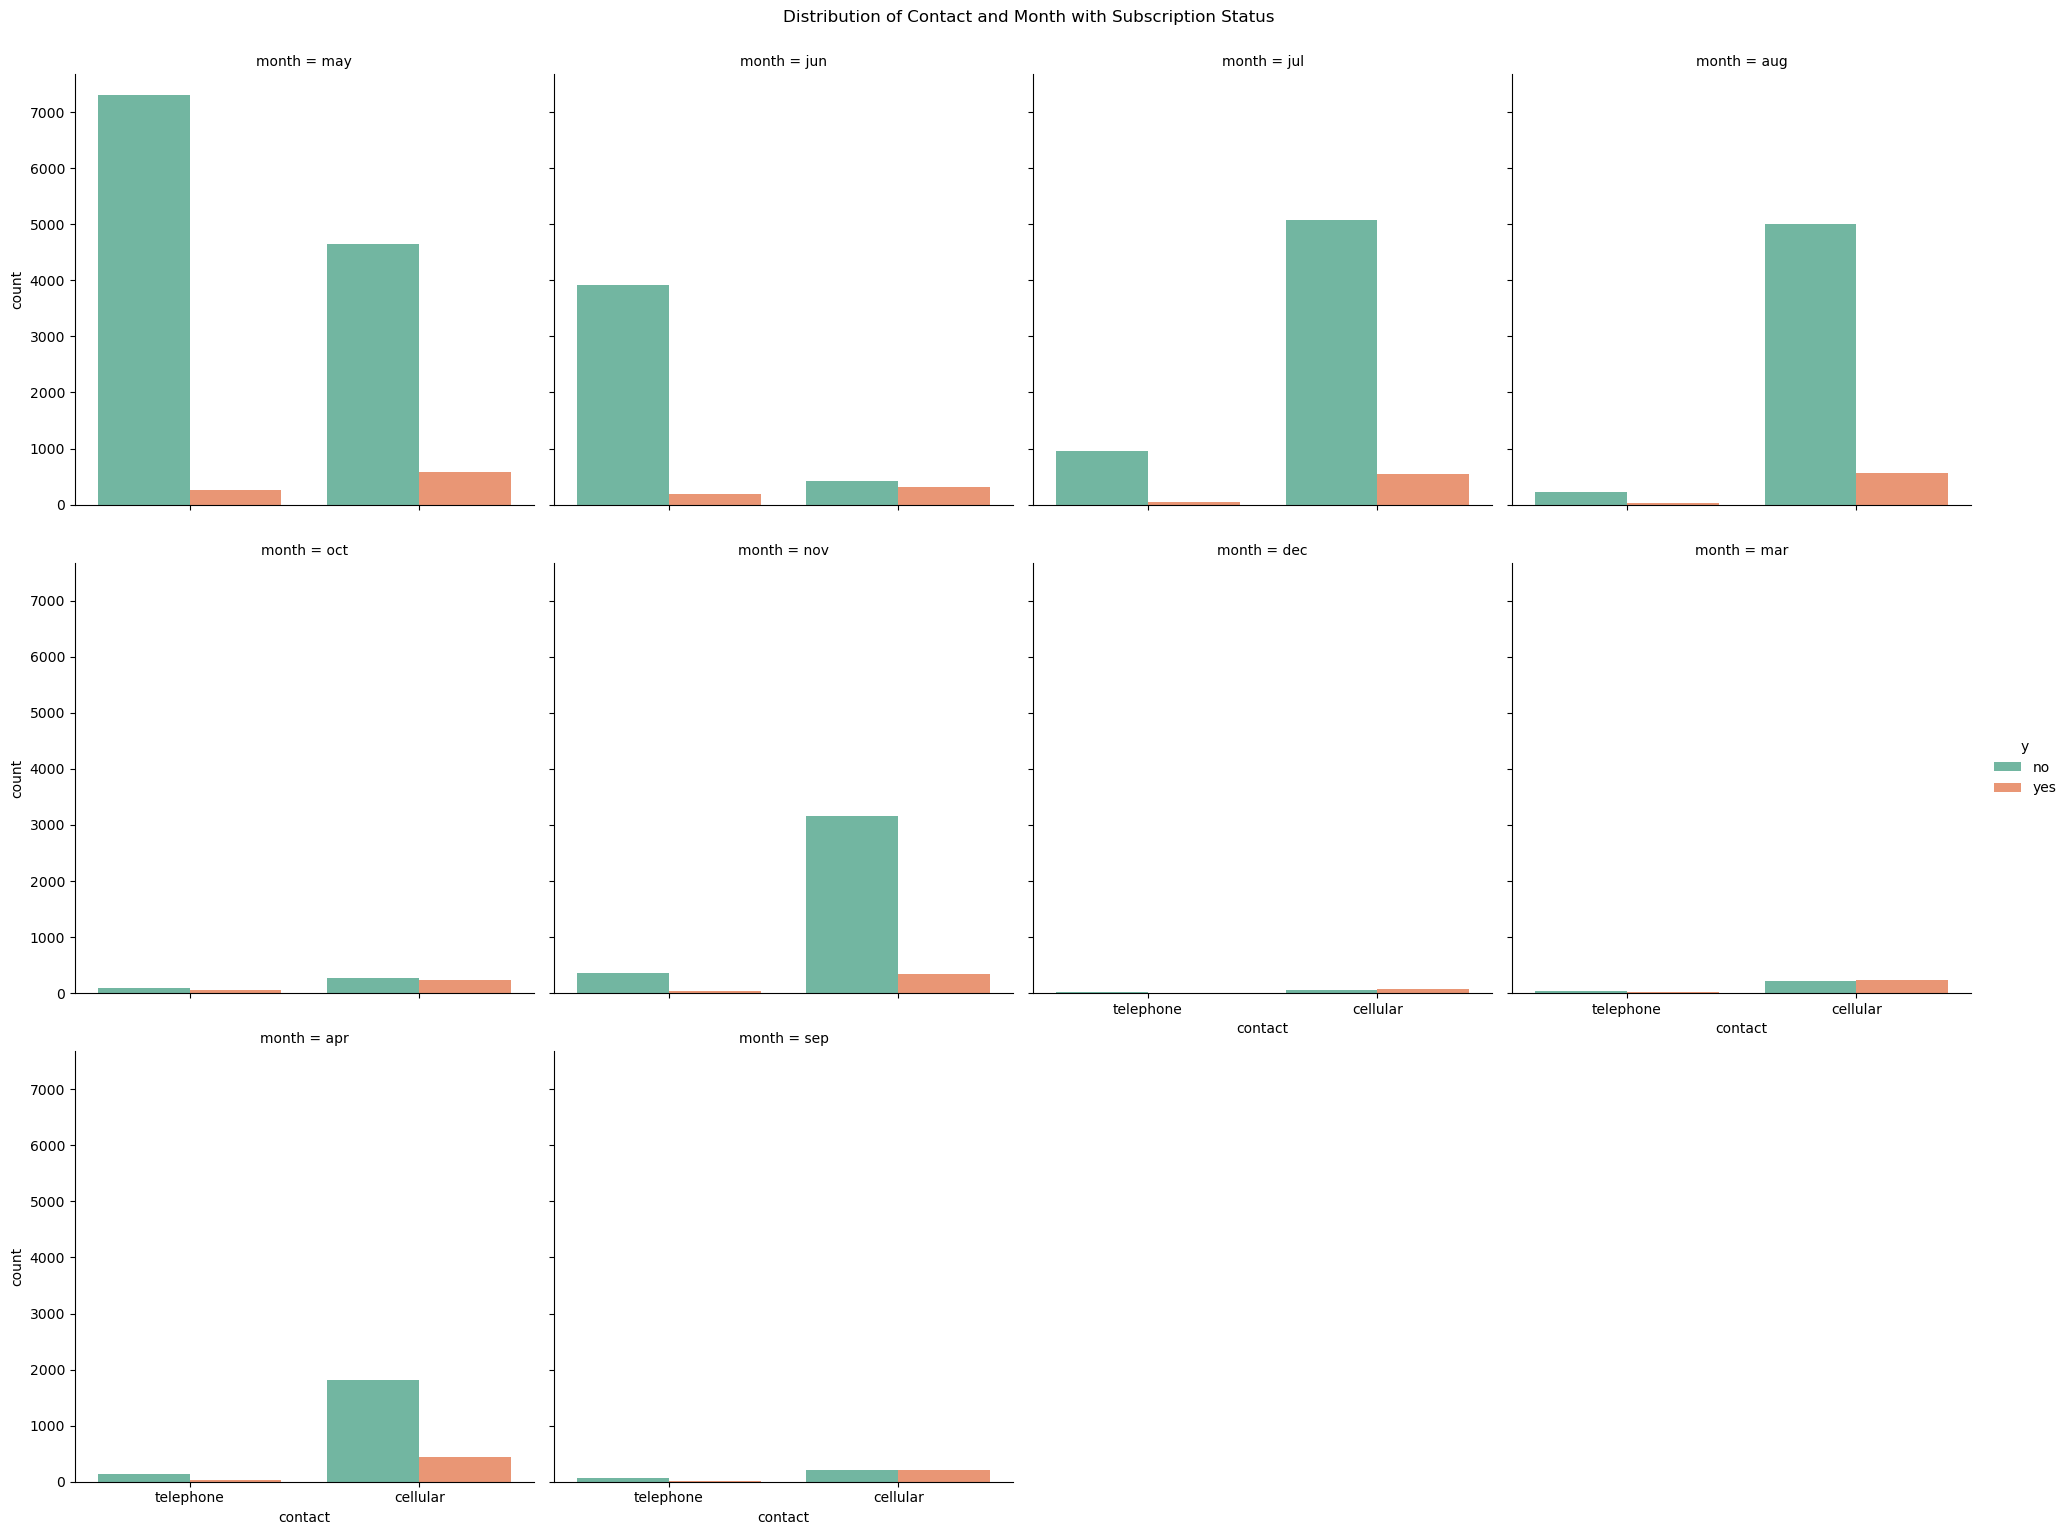

In [61]:
sns.catplot(x='contact', hue='y', col='month', data=bank_df, kind='count', palette='Set2', col_wrap=4)
plt.suptitle('Distribution of Contact and Month with Subscription Status', y=1.02)
plt.show()

The plot offers a visual comparison of the contact methods used in the marketing campaign across different months, segmented by clients' subscription status. The months of May, July, August, and June show the highest contact frequencies via cellular methods. However, the 'No' subscription rate is higher than the 'Yes' rate, indicating a lower success rate for term deposit subscriptions during these months.

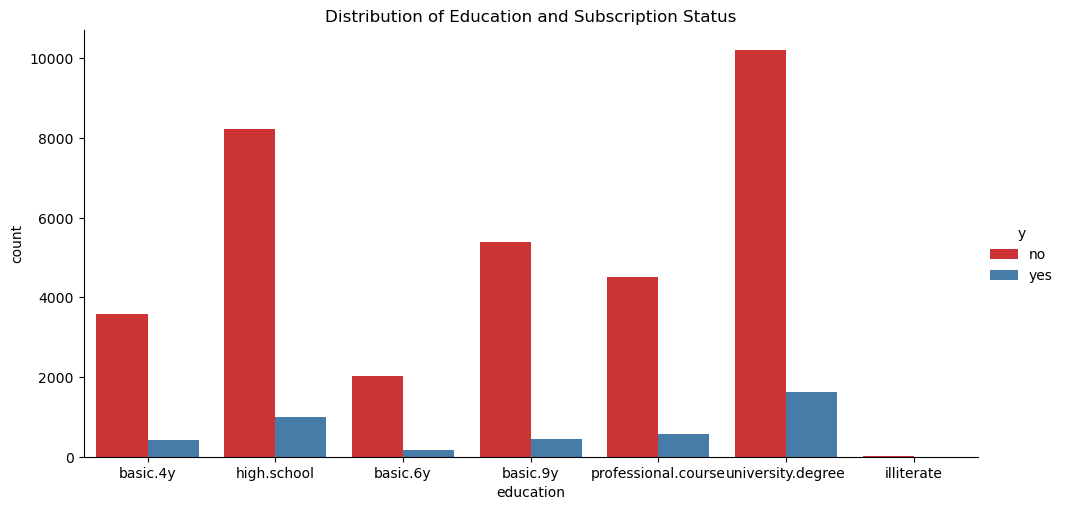

In [63]:
sns.catplot(x='education', hue='y', data=bank_df, kind='count', palette='Set1', aspect=2)
plt.title('Distribution of Education and Subscription Status')
plt.show()

The plot illustrates the distribution of clients by education level, with color-coding indicating their subscription status to a term deposit. There is very low percentage of clients are iliterate, suggesting that the majority of clients have at completed high school.

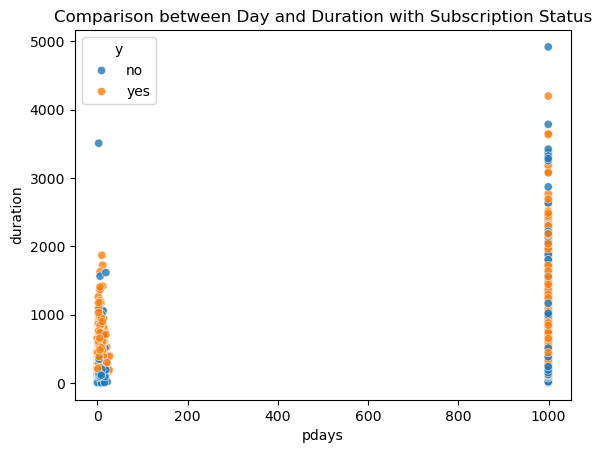

In [65]:
sns.scatterplot(x='pdays', y='duration', data=bank_df, hue='y', alpha=0.8)
plt.title('Comparison between Day and Duration with Subscription Status')
plt.show()

The Plot illustrate the comparison between day and duration with subscription status to a term deposit. 

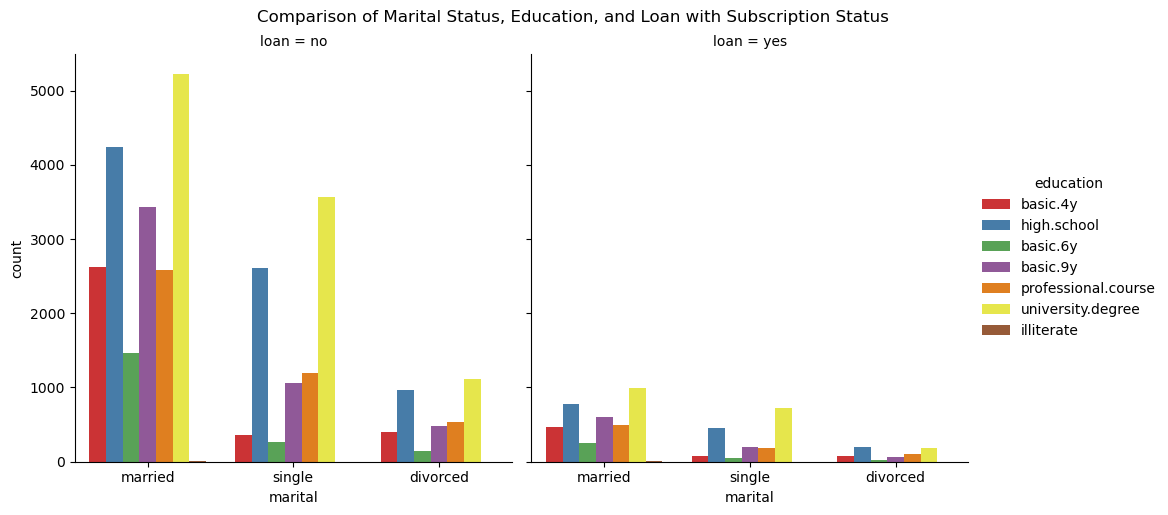

In [67]:
sns.catplot(x='marital', hue='education', col='loan', data=bank_df, kind='count', palette='Set1', col_wrap=2)
plt.suptitle('Comparison of Marital Status, Education, and Loan with Subscription Status', y=1.02)
plt.show()

This visualization provides insights into the distribution of clients' marital status and education across different loan statuses. However, the 'No' subscription rate is higher than the 'Yes' rate, indicating a lower success rate for term deposit subscriptions.

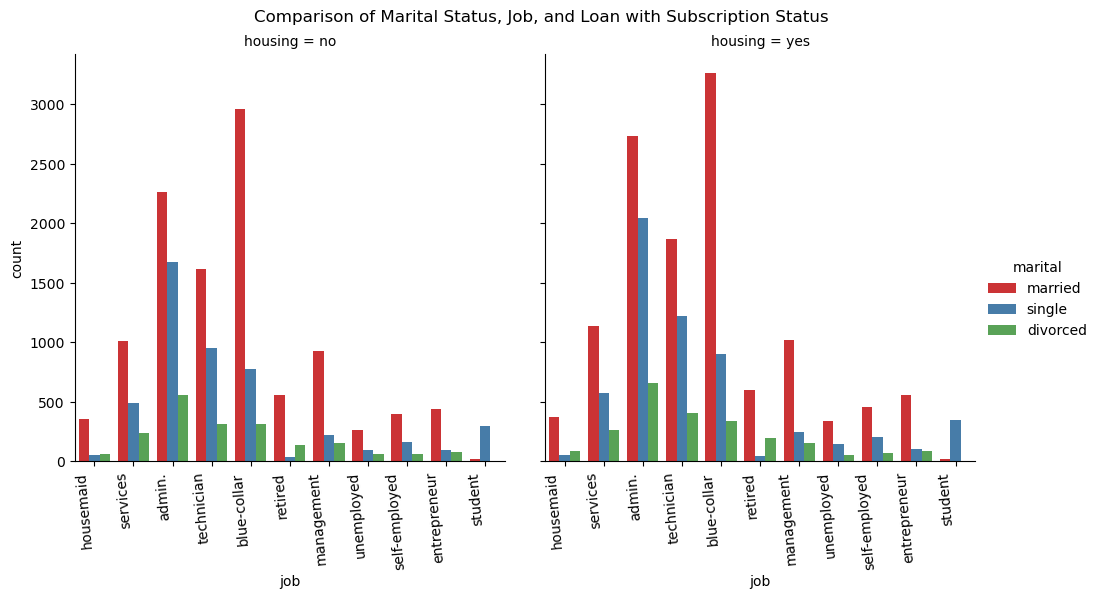

In [69]:
s=sns.catplot(x='job', hue='marital', col='housing', data=bank_df, kind='count', palette='Set1', col_wrap=2)
plt.suptitle('Comparison of Marital Status, Job, and Loan with Subscription Status', y=1.02)
s.set_xticklabels(rotation=95, ha='right')
plt.show()

The plot compares clients' jobs and marital status, segmented by whether they have housing loans. This visualization reveals that the 'Yes' subscription rate is higher than the 'No' rate, indicating a relatively higher success rate for term deposit subscriptions among certain professions.

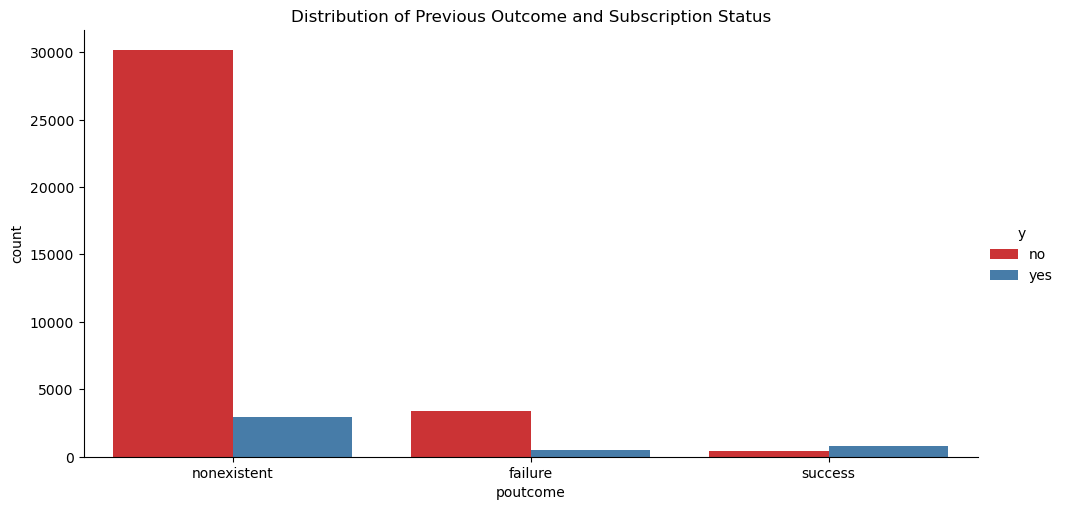

In [71]:
sns.catplot(x='poutcome', hue='y', data=bank_df, kind='count', palette='Set1', aspect=2)
plt.title('Distribution of Previous Outcome and Subscription Status')
plt.show()

The plot shows the distribution of clients' previous campaign outcomes and their current subscription status. It reveals that the 'No' subscription rate is higher than the 'Yes' rate, indicating a lower success rate for term deposit subscriptions among clients with unknown outcomes from previous campaigns.

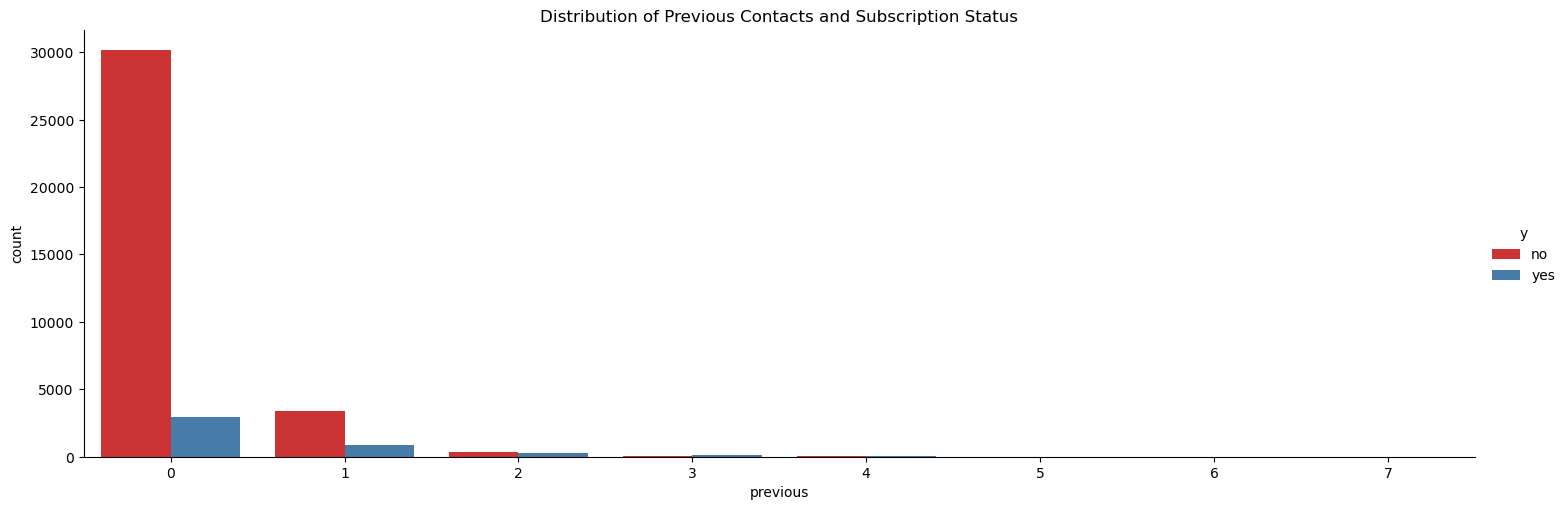

In [73]:
sns.catplot(x='previous', hue='y', data=bank_df, kind='count', palette='Set1', aspect=3)
plt.title('Distribution of Previous Contacts and Subscription Status')
plt.show()

The plot above visualizes the distribution of previous contacts and subscription status, showing the count of clients who subscribed to a term deposit versus those who did not, categorized by the number of prior contacts. This provides insights into the relationship between the number of previous contacts and the likelihood of a client subscribing to a term deposit. It reveals that the 'No' subscription rate is higher than the 'Yes' rate, indicating a lower success rate for term deposit subscriptions among clients with more prior contacts.

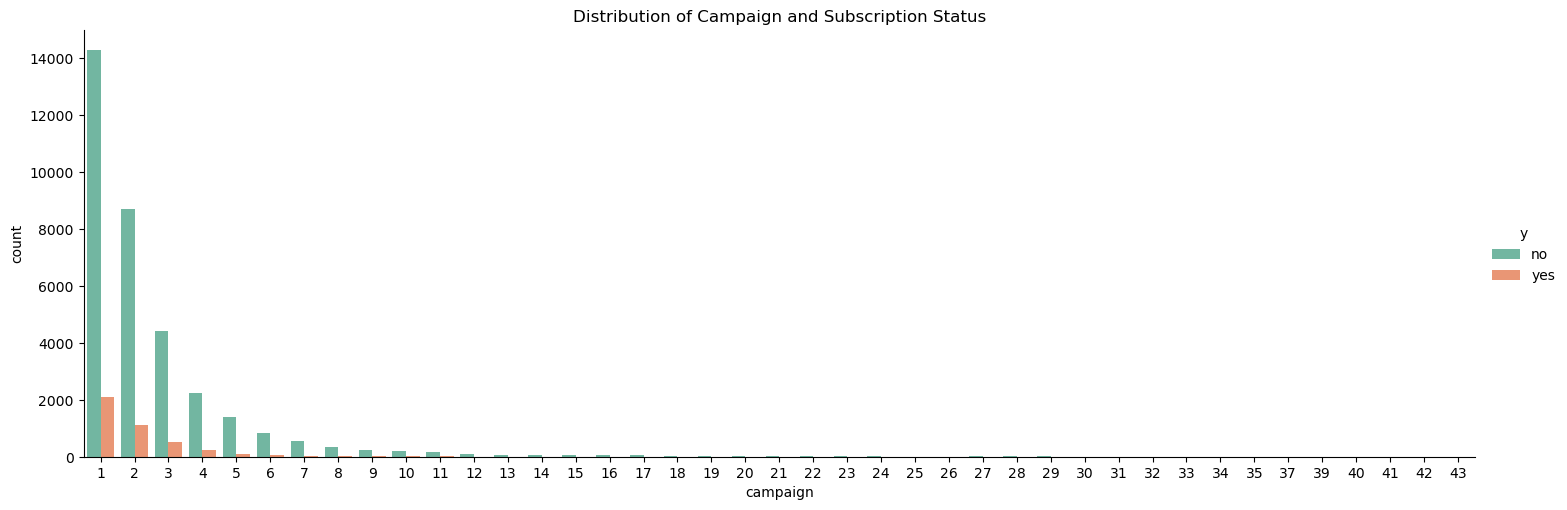

In [75]:
sns.catplot(x='campaign', hue='y', data=bank_df, kind='count', palette='Set2', aspect=3)
plt.title('Distribution of Campaign and Subscription Status')
plt.show()

The plot visualizes the number of contacts made during the current campaign and the clients' subscription status. It shows that the 'No' subscription rate is higher than the 'Yes' rate, indicating a lower success rate for term deposit subscriptions resulting from the campaign.

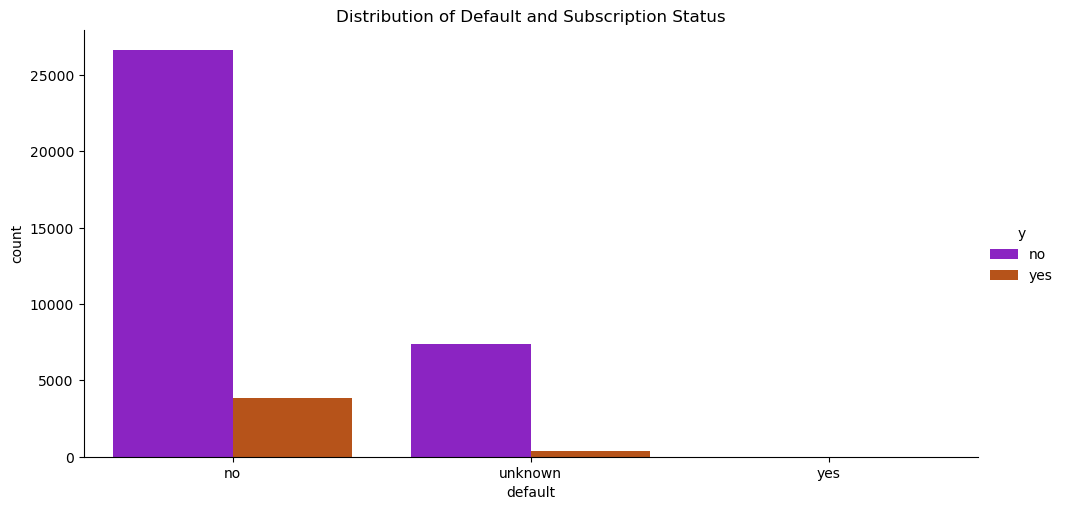

In [77]:
sns.catplot(x='default', hue='y', data=bank_df, kind='count', palette = 'gnuplot', aspect=2)
plt.title('Distribution of Default and Subscription Status')
plt.show()

The plot displays the distribution of clients based on whether they have credit in default and their subscription status to a term deposit. It shows that the 'No' subscription rate is higher than the 'Yes' rate, indicating a lower success rate for term deposit subscriptions among clients with credit in default.

### Multivariate Analysis

Multivariate Analysis is a statistical technique used to examine the relationships between more than two variables simultaneously. It allows for a deeper understanding of complex data by assessing how multiple factors interact with each other and influence a particular outcome. This type of analysis is essential when there are several variables that could be affecting a result, and helps to uncover patterns, trends, and dependencies that might not be apparent when looking at variables in isolation.

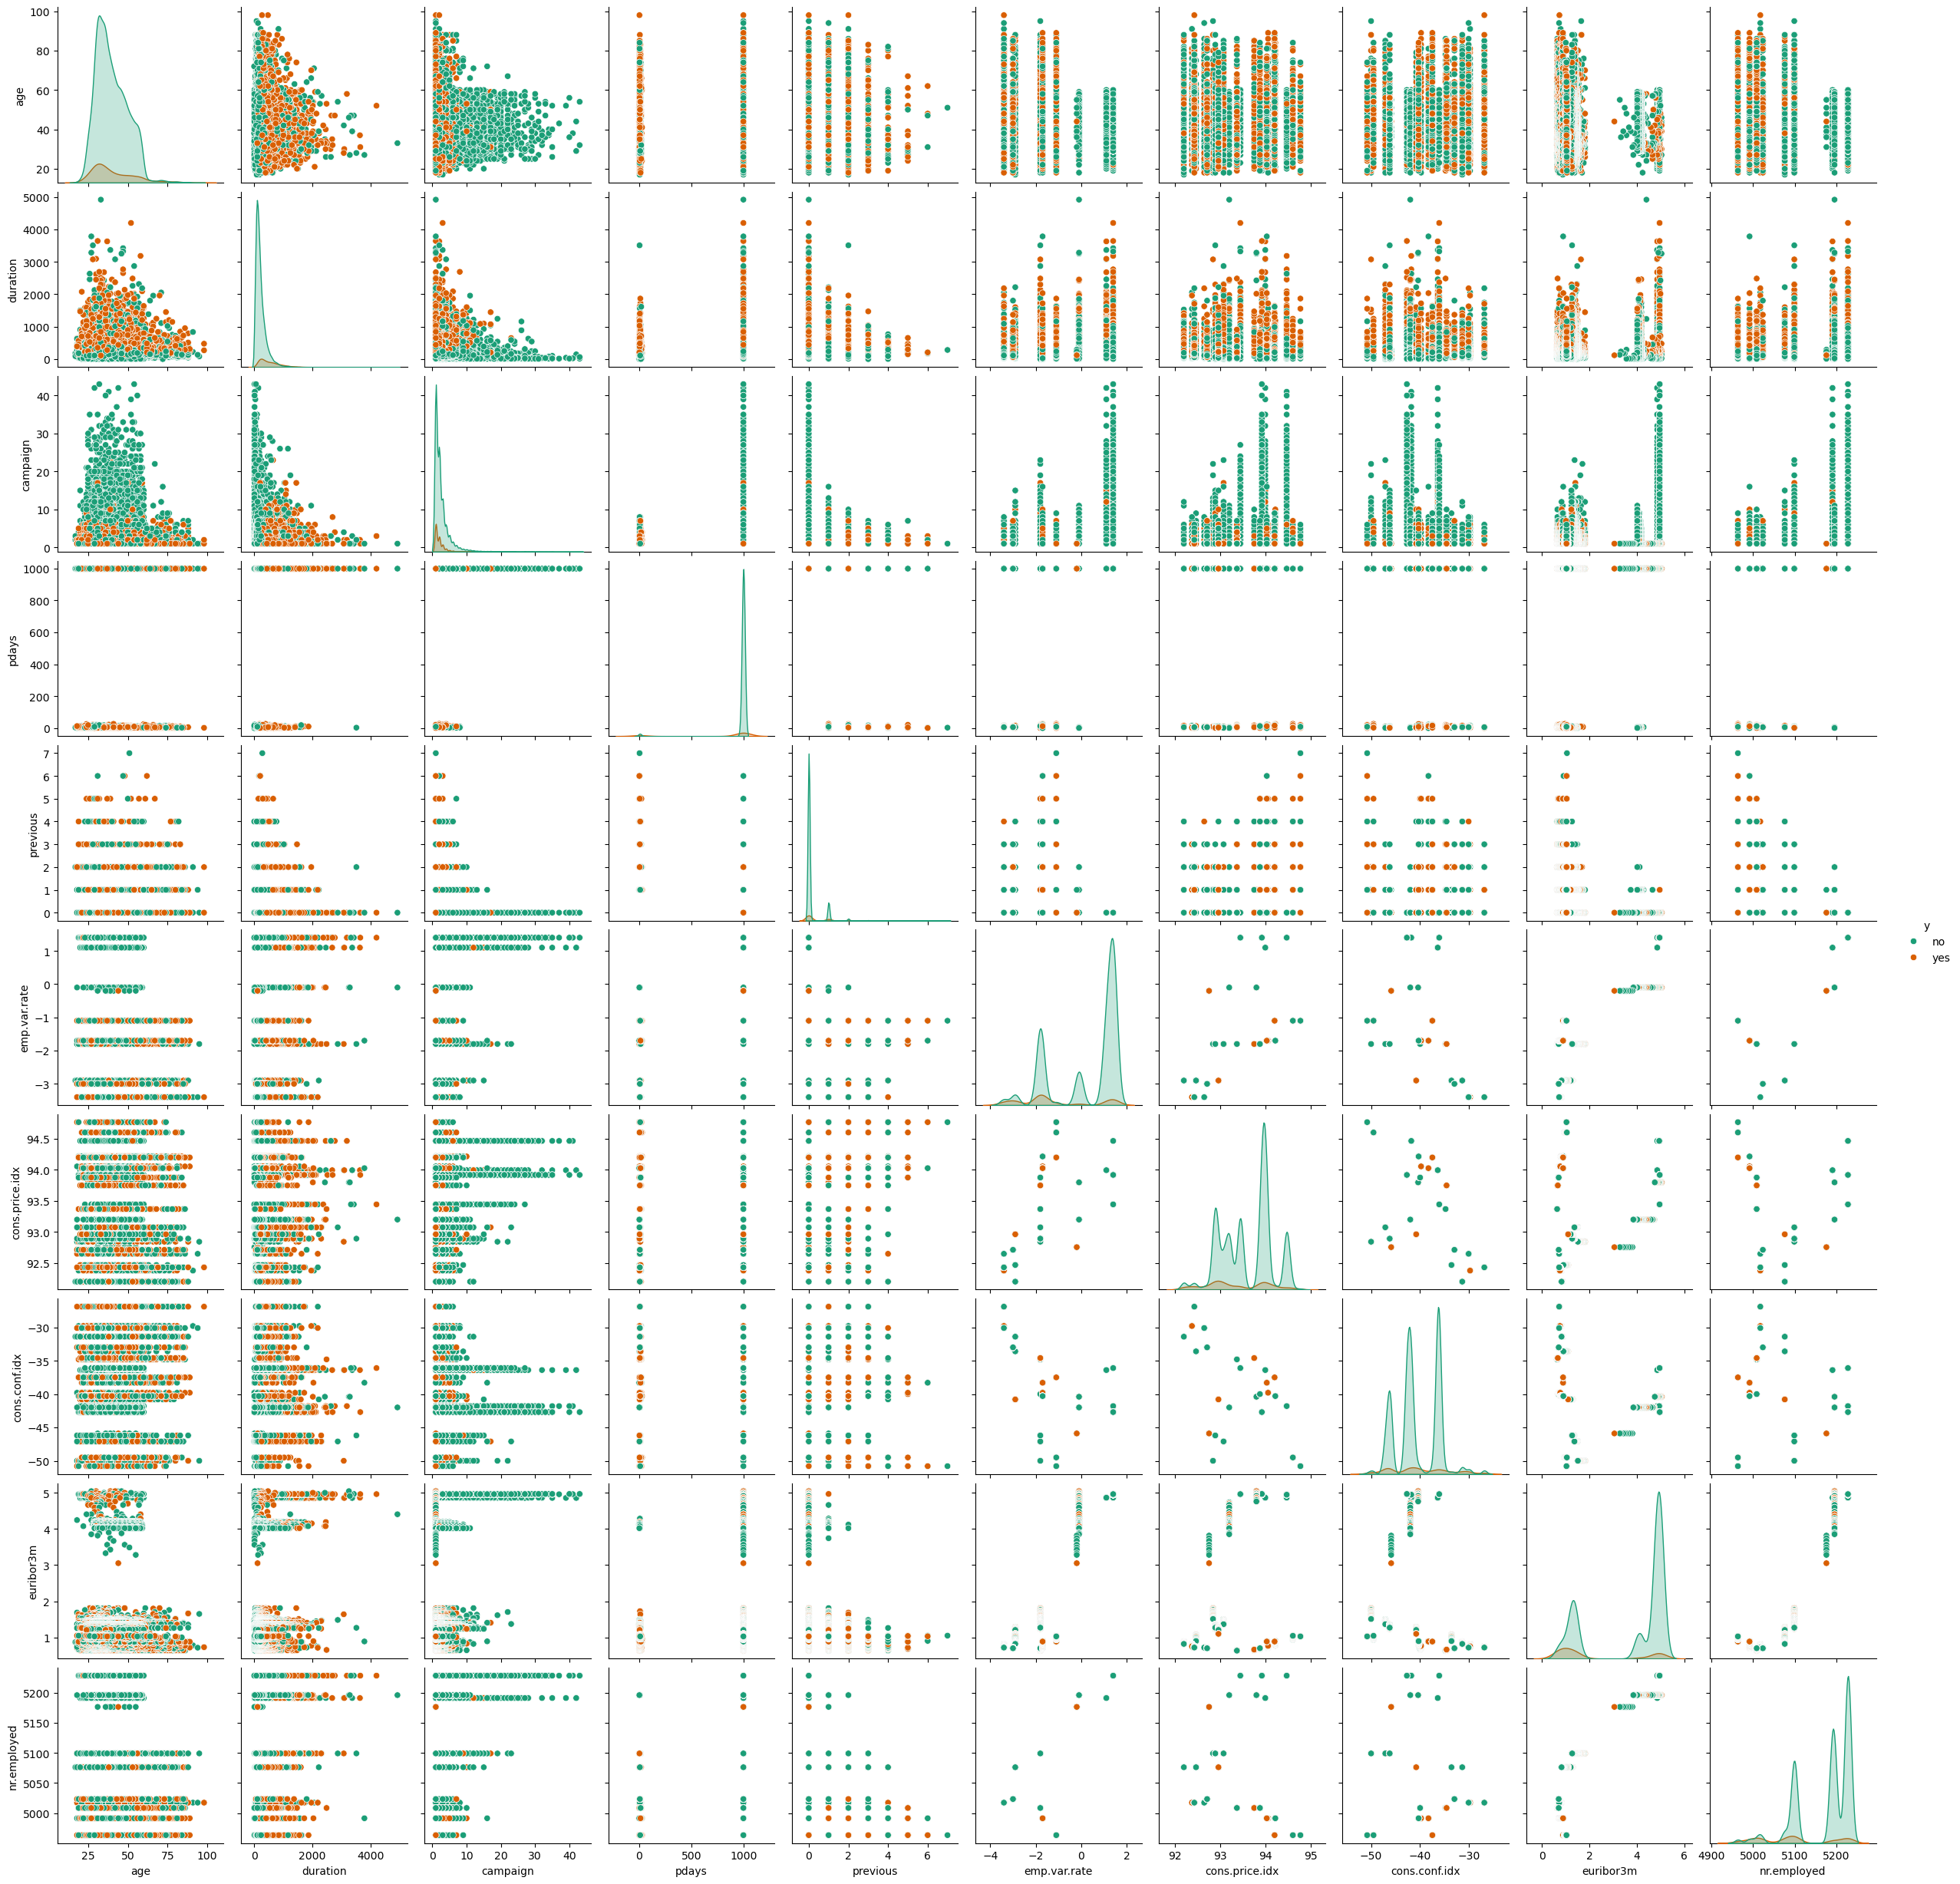

In [79]:
sns.pairplot(bank_df, hue ='y',palette = 'Dark2')
plt.show()

There is a strong positive correlation between age and campaign for clients aged 20 to 60, indicating that the campaign is more frequent within this age group. Additionally, a moderate positive correlation is observed between the consumer price index and the campaign data.

### Find the categorical and numerial column.

In [81]:
cat_col = []
for i in bank_df.dtypes.index:
    if bank_df[i].dtypes == 'object':
        cat_col.append(i)
print("Categorical Columns:", cat_col)
print('\n')

num_col = []
for i in bank_df.dtypes.index:
    if bank_df[i].dtypes != 'object':
        num_col.append(i)
print("Numerical Columns:", num_col)
print('\n')

Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


Numerical Columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']




Additiional plotting on Numerical column of Dataset.

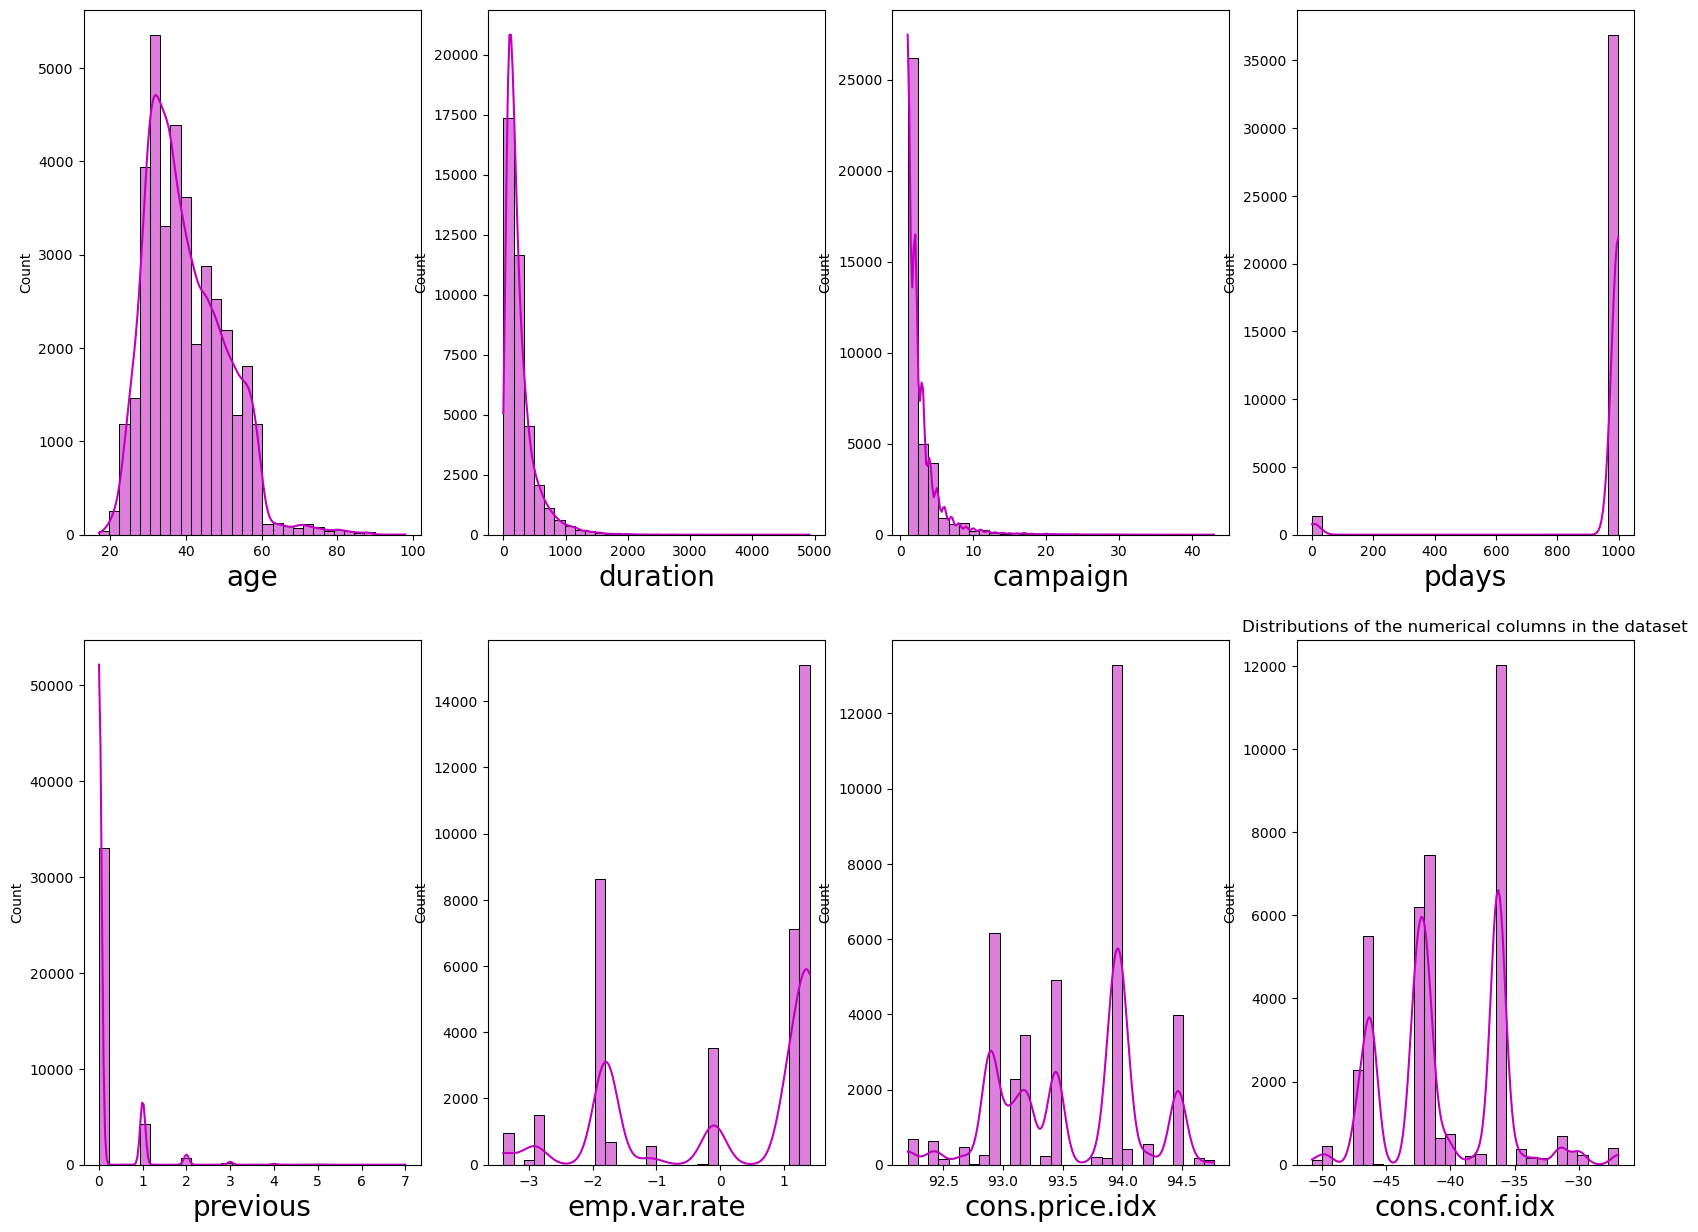

In [83]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1

for col in num_col:
    if plotnumber <=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.histplot(bank_df[col],color = 'm', kde=True, bins=30)
        plt.xlabel(col, fontsize=20)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.title('Distributions of the numerical columns in the dataset')
plt.show()

The visualizations above provide a comprehensive view of the distributions of various numerical columns in the dataset. Each subplot represents a different numerical attribute, offering insights into the distribution patterns, skewness, and the presence of any outliers. By examining these visualizations, we can identify the shape of the distribution for each variable, whether it follows a normal distribution or is skewed in one direction. Additionally, the plots highlight any potential outliers or anomalies that may need further investigation or data cleaning. These visualizations are essential for understanding the underlying structure of the data and informing any subsequent analysis or modeling steps.

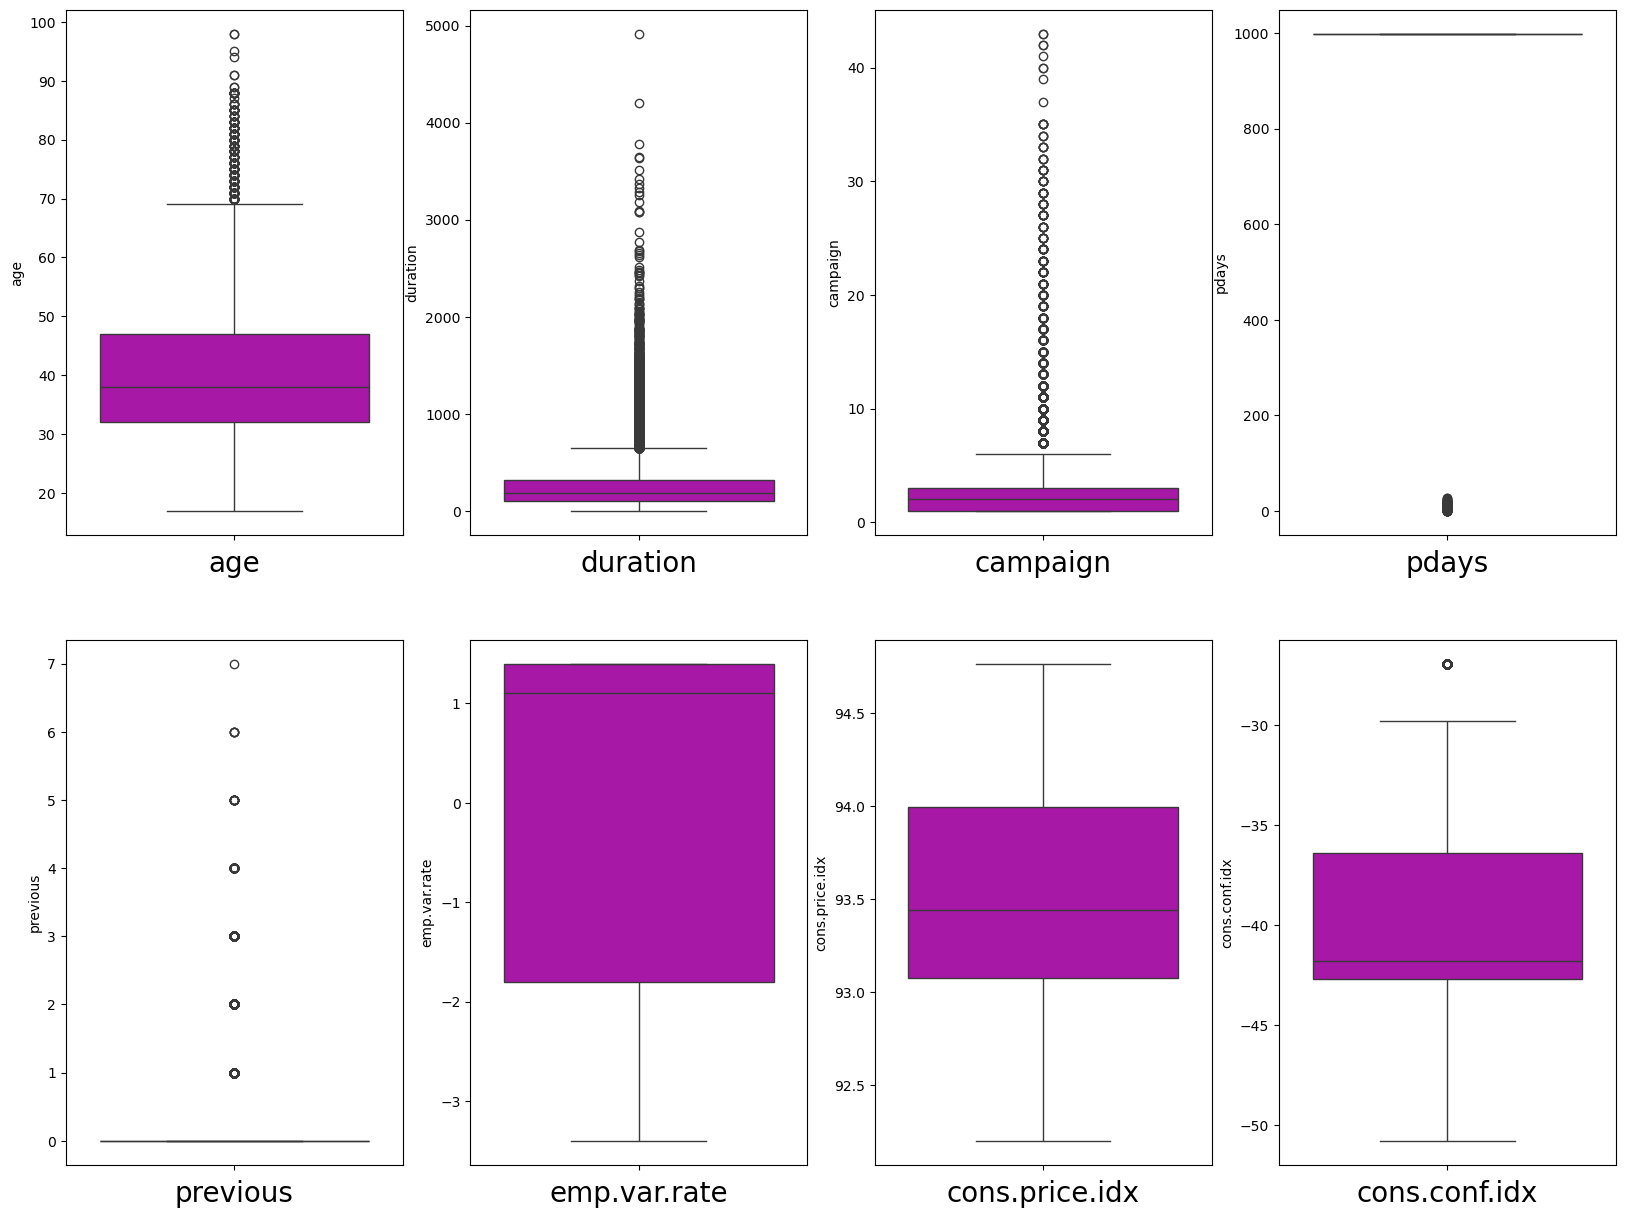

In [85]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1

for col in num_col:
    if plotnumber <=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.boxplot(bank_df[col],color = 'm')
        plt.xlabel(col, fontsize=20)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.show()

The boxplots above offer a visual summary of the distributions of the numerical columns, providing a clear representation of key statistical measures such as the median, quartiles, and potential outliers for each attribute. The central line within each box represents the median, which indicates the middle value of the data. The box itself spans from the first quartile (25th percentile) to the third quartile (75th percentile), encompassing the interquartile range (IQR), where the bulk of the data lies. The "whiskers" extending from the box indicate the range of data within 1.5 times the IQR from the quartiles. Any data points outside this range are considered outliers and are typically marked individually. By using boxplots, we can quickly assess the spread, central tendency, and any extreme values or outliers within the dataset, which is valuable for data exploration and preparation.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

### Encoding Catgeorical Columns

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Apply label encoding to categorical columns
bank_df['job_encoded'] = le.fit_transform(bank_df['job'])
bank_df['marital_encoded'] = le.fit_transform(bank_df['marital'])
bank_df['education_encoded'] = le.fit_transform(bank_df['education'])
bank_df['default_encoded'] = le.fit_transform(bank_df['default'])
bank_df['housing_encoded'] = le.fit_transform(bank_df['housing'])
bank_df['loan_encoded'] = le.fit_transform(bank_df['loan'])
bank_df['contact_encoded'] = le.fit_transform(bank_df['contact'])
bank_df['month_encoded'] = le.fit_transform(bank_df['month'])
bank_df['day_of_week_encoded'] = le.fit_transform(bank_df['day_of_week'])
bank_df['poutcome_encoded'] = le.fit_transform(bank_df['poutcome'])
bank_df['y_encoded'] = le.fit_transform(bank_df['y'])
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  41188 non-null  int64  
 1   job                  41188 non-null  object 
 2   marital              41188 non-null  object 
 3   education            41188 non-null  object 
 4   default              41188 non-null  object 
 5   housing              41188 non-null  object 
 6   loan                 41188 non-null  object 
 7   contact              41188 non-null  object 
 8   month                41188 non-null  object 
 9   day_of_week          41188 non-null  object 
 10  duration             41188 non-null  int64  
 11  campaign             41188 non-null  int64  
 12  pdays                41188 non-null  int64  
 13  previous             41188 non-null  int64  
 14  poutcome             41188 non-null  object 
 15  emp.var.rate         41188 non-null 

The code provided uses the LabelEncoder from the sklearn.preprocessing library to convert categorical variables in a pandas DataFrame (bank_df) into numerical values, making them suitable for machine learning models that require numerical inputs.
The LabelEncoder is applied to each categorical column, and the transformed data is stored in new columns with names ending in _encoded

### Correlation between target variable and independent variables

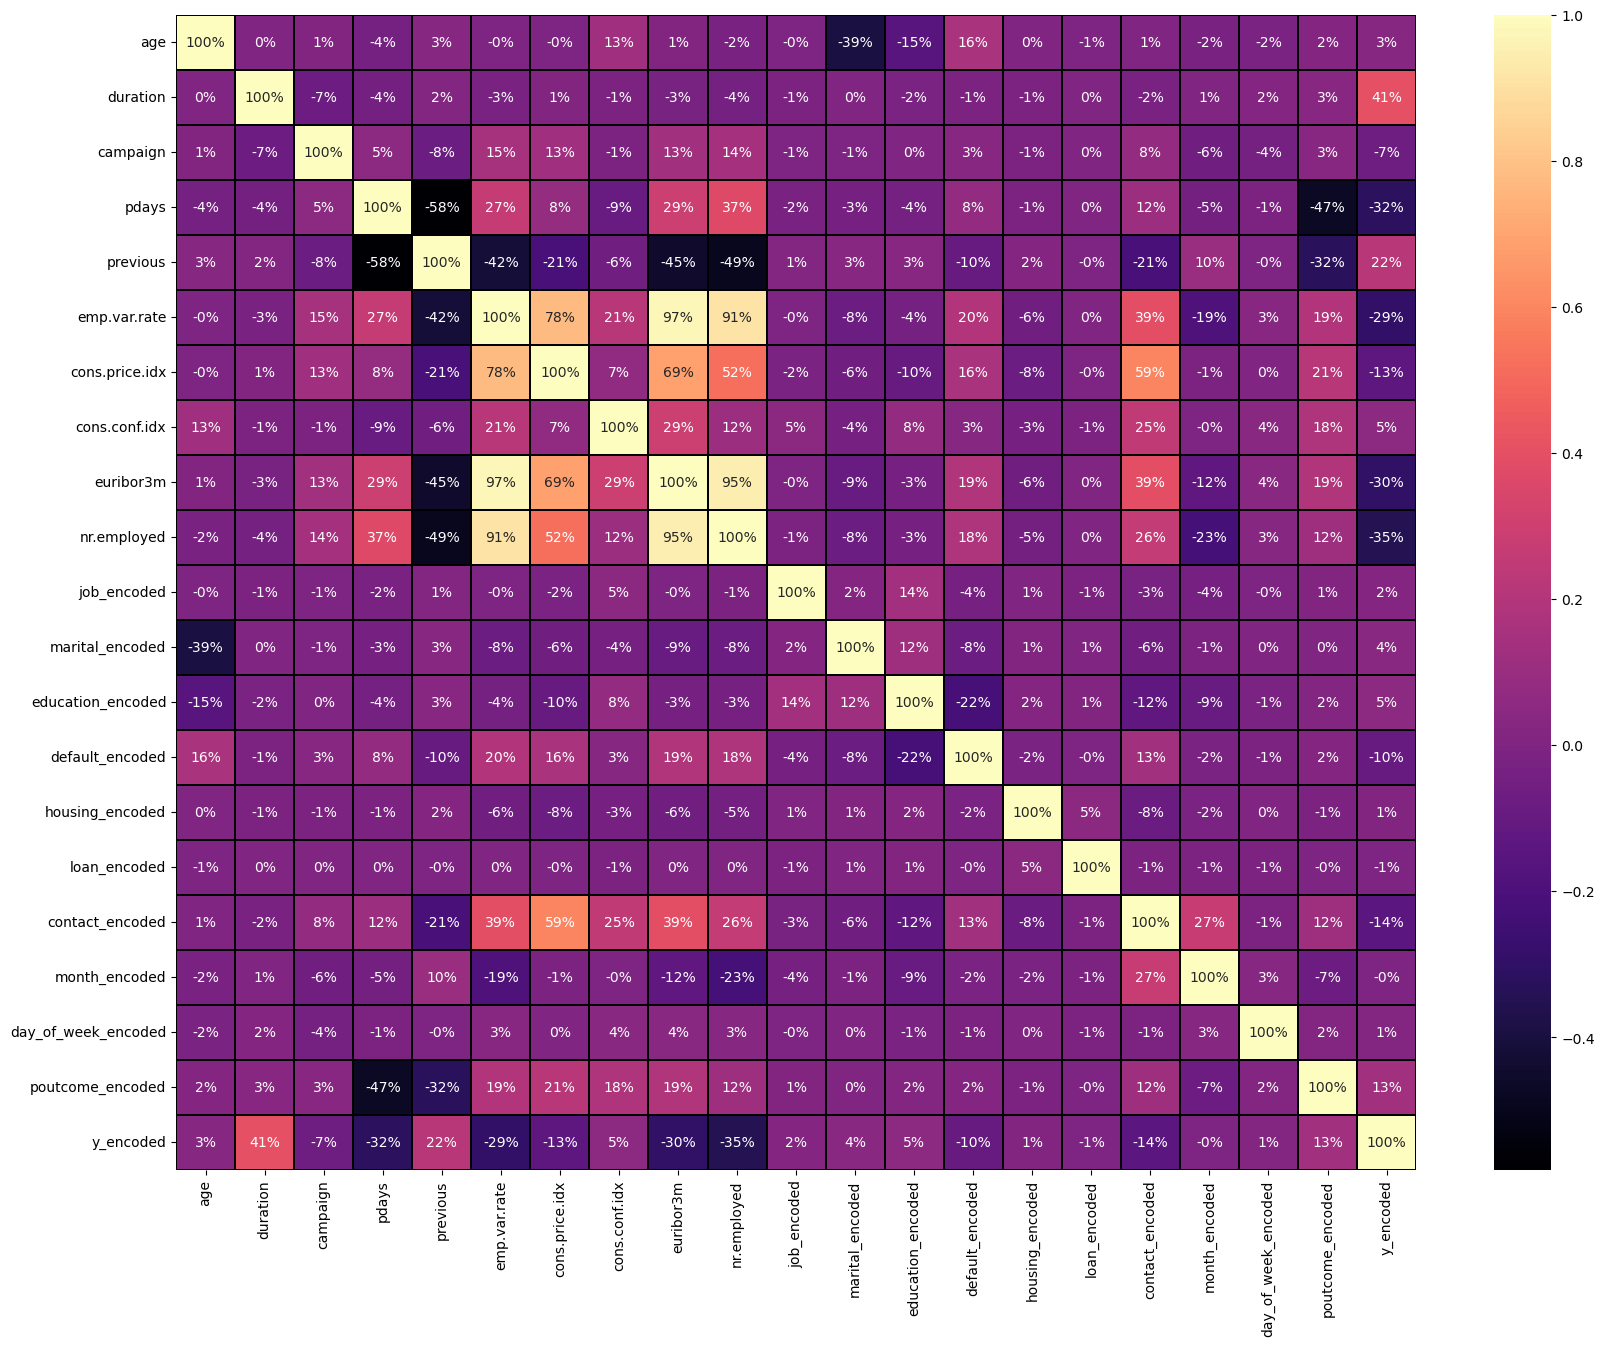

In [89]:
numerical_df = bank_df.select_dtypes(include=['float64', 'int64', 'int32'])
plt.figure(figsize = (20,15))
sns.heatmap(numerical_df.corr(), linewidths=0.1, fmt = '0.0%', linecolor ='black', annot = True, cmap = 'magma')
plt.yticks(rotation=0)
plt.show()

The heatmap displayed above is a powerful visual representation of the correlation matrix for the dataset. A correlation matrix is a table showing the correlation coefficients between variables, which helps to identify the relationships between them. In this case, the heatmap uses color intensity to communicate the strength and direction of these relationships. Specifically, darker colors represent stronger correlations, while lighter colors indicate weaker ones.

From the heatmap, we can observe that certain variables, such as "pdays" and "poutcome", exhibit a strong negative correlation. This means that as the value of one variable increases, the value of the other tends to decrease significantly, and the relationship between them is quite pronounced. The negative correlation implies that higher values of "pdays" (the number of days since the last contact with a client) tend to coincide with lower values of "poutcome" (the outcome of the previous marketing campaign).

Similarly, another strong negative correlation is evident between "pdays" and "previous", which measures the number of contacts performed before the current one. This suggests that as "pdays" increases, "previous" decreases in a predictable, strong manner. The precise correlation values, which are annotated on the heatmap, provide exact percentage figures to quantify these relationships.

The annotations allow for an even deeper understanding of the dataset by providing exact correlation coefficients between each pair of variables. For example, a correlation coefficient of -0.8 or -0.9 would indicate a very strong negative relationship, which is easier to interpret when looking at the annotations. This feature makes it easier for analysts to quickly spot which variables are most strongly related to each other, whether positively or negatively.

In summary, this heatmap not only helps visualize the overall structure of relationships within the dataset but also allows for a more granular understanding of how variables like "pdays", "poutcome", and "previous" are interrelated. By focusing on the strongest correlations, one can identify which features might be important for further analysis or model development.

### Data Preparation

Preparing the dataset involves selecting the relevant features and the target variable that will be used for data modeling. This step includes identifying and processing the most useful attributes, handling missing values, encoding categorical variables, and ensuring that the data is clean and structured for effective model training. By focusing on the features that have the most predictive power and defining the target variable clearly, we create a well-prepared dataset ready for analysis and modeling.

In [25]:
bank_filtered_df = bank_df[['age', 'job_encoded', 'marital_encoded', 'education_encoded', 'default_encoded','housing_encoded','loan_encoded','contact_encoded','month_encoded',
                 'day_of_week_encoded','duration','campaign','pdays','previous','poutcome_encoded','emp.var.rate','cons.price.idx',
                 'cons.conf.idx','euribor3m','nr.employed','y_encoded']]

bank_filtered_target_df = bank_filtered_df['y_encoded']

In [93]:
print (bank_filtered_df.head())
print (bank_filtered_df.shape)

   age  job_encoded  marital_encoded  education_encoded  default_encoded  \
0   56            3                1                  0                0   
1   57            7                1                  3                1   
2   37            7                1                  3                0   
3   40            0                1                  1                0   
4   56            7                1                  3                0   

   housing_encoded  loan_encoded  contact_encoded  month_encoded  \
0                0             0                1              6   
1                0             0                1              6   
2                1             0                1              6   
3                0             0                1              6   
4                0             1                1              6   

   day_of_week_encoded  ...  campaign  pdays  previous  poutcome_encoded  \
0                    1  ...         1    999         0    

### Dataset with target feature

In [27]:
print (bank_filtered_target_df.head())
print (bank_filtered_target_df.shape)

0    0
1    0
2    0
3    0
4    0
Name: y_encoded, dtype: int32
(41188,)


In [29]:
#Before running the classification model we need to drop the target value labels
bank_filtered_df = bank_filtered_df.drop('y_encoded', axis=1)
print (bank_filtered_df.head())

   age  job_encoded  marital_encoded  education_encoded  default_encoded  \
0   56            3                1                  0                0   
1   57            7                1                  3                1   
2   37            7                1                  3                0   
3   40            0                1                  1                0   
4   56            7                1                  3                0   

   housing_encoded  loan_encoded  contact_encoded  month_encoded  \
0                0             0                1              6   
1                0             0                1              6   
2                2             0                1              6   
3                0             0                1              6   
4                0             2                1              6   

   day_of_week_encoded  duration  campaign  pdays  previous  poutcome_encoded  \
0                    1       261         1    999    

In [31]:
print (bank_filtered_df.shape)

(41188, 20)


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

**Split the dataset into train and test with 80% training and 20% testing data.**

In [33]:
#set train and test data 80% train 20% test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_filtered_df.values, bank_filtered_target_df, test_size=0.2,random_state=0)
print (X_train)
print (X_train.shape)
print (y_train)
print (y_train.shape)
print (X_test)
print (y_test)
print (y_test.shape)

[[ 4.0000e+01  7.0000e+00  0.0000e+00 ... -4.7100e+01  1.4050e+00
   5.0991e+03]
 [ 3.3000e+01  1.0000e+01  1.0000e+00 ... -3.6100e+01  4.9630e+00
   5.2281e+03]
 [ 3.1000e+01  0.0000e+00  0.0000e+00 ... -3.4800e+01  6.5500e-01
   5.0087e+03]
 ...
 [ 2.9000e+01  0.0000e+00  2.0000e+00 ... -4.7100e+01  1.3650e+00
   5.0991e+03]
 [ 3.5000e+01  3.0000e+00  2.0000e+00 ... -3.6100e+01  4.9630e+00
   5.2281e+03]
 [ 5.2000e+01  0.0000e+00  1.0000e+00 ... -3.6400e+01  4.8590e+00
   5.1910e+03]]
(32950, 20)
29321    0
23925    0
39148    1
12078    0
41021    0
        ..
20757    0
32103    0
30403    1
21243    0
2732     0
Name: y_encoded, Length: 32950, dtype: int32
(32950,)
[[ 3.9000e+01  1.0000e+00  1.0000e+00 ... -4.2700e+01  4.9570e+00
   5.2281e+03]
 [ 5.5000e+01  1.0000e+00  1.0000e+00 ... -4.7100e+01  1.4050e+00
   5.0991e+03]
 [ 3.9000e+01  1.0000e+00  1.0000e+00 ... -4.1800e+01  4.9610e+00
   5.2281e+03]
 ...
 [ 3.4000e+01  0.0000e+00  2.0000e+00 ... -4.0300e+01  8.0200e-01
   4.99

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

### Baseline Model on  Decision Tree

In [35]:
#Classification using Decision Tree Classifier parameter tuning

import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import accuracy_score

# Create a dictionary to store results
results = []

base_decision_classifier = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_split=2, min_samples_leaf=1, max_features=None, max_leaf_nodes=None)
start_time = time.time()  # Start the timer
fit = base_decision_classifier.fit(X_train, y_train)
y_pre_dt = fit.predict(X_test)
train_time_dt = time.time() - start_time  # Calculate train time
train_acc_dt = accuracy_score(y_train, fit.predict(X_train))  # Train accuracy
test_acc_dt = accuracy_score(y_test, y_pre_dt)  # Test accuracy
results.append(['Decision Tree', train_time_dt, train_acc_dt, test_acc_dt])
confusion_matrix_base_model_dt = confusion_matrix(y_test, y_pre_dt)

print (confusion_matrix_base_model_dt)
print (classification_report(y_test,y_pre_dt))

precision_dt = precision_score(y_test, y_pre_dt)

# After evaluation, print the best precision
print(f"Precision for decision tree base model on test data: {precision_dt}")
        

[[7050  269]
 [ 523  396]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7319
           1       0.60      0.43      0.50       919

    accuracy                           0.90      8238
   macro avg       0.76      0.70      0.72      8238
weighted avg       0.89      0.90      0.90      8238

Precision for decision tree base model on test data: 0.5954887218045113


In [105]:
print ("[Train/test split] score: {:.5f}".format(base_decision_classifier.score(X_test, y_test)))

[Train/test split] score: 0.90548


**Validate the feature and target datasets. It is important that datasets should match the length.** 

In [107]:
print(bank_filtered_df.shape)
print(bank_filtered_target_df.shape)
print(bank_filtered_df.index)
print(bank_filtered_target_df.index)

(38245, 20)
(38245,)
Index([    0,     1,     2,     3,     4,     5,     6,     8,     9,    11,
       ...
       41178, 41179, 41180, 41181, 41182, 41183, 41184, 41185, 41186, 41187],
      dtype='int64', length=38245)
Index([    0,     1,     2,     3,     4,     5,     6,     8,     9,    11,
       ...
       41178, 41179, 41180, 41181, 41182, 41183, 41184, 41185, 41186, 41187],
      dtype='int64', length=38245)


**Confusion Matrix to review Decision Tree base model performance**

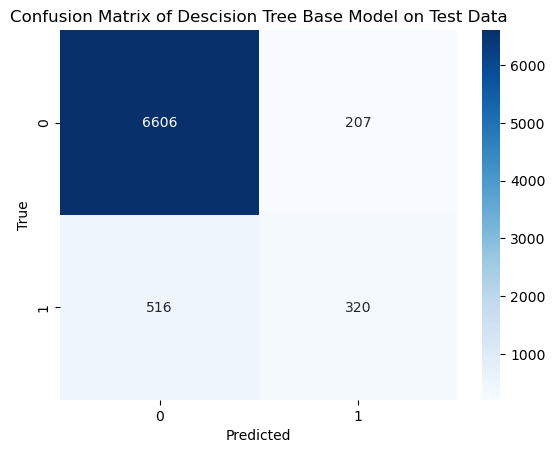

In [109]:
sns.heatmap(confusion_matrix_base_model_dt, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of Descision Tree Base Model on Test Data")
plt.show()

### Baseline Model on KNeighbour Classifier

In [111]:
#KNearest Neighbour Clasification
from sklearn.neighbors import KNeighborsClassifier

base_kneighbour_classifier = KNeighborsClassifier(n_neighbors = 4, weights='distance', metric='minkowski', p=1)
start_time = time.time()  # Start the timer
knn = base_kneighbour_classifier.fit(X_train, y_train)
y_pre_knn = knn.predict(X_test)
train_time_knn = time.time() - start_time  # Calculate train time

train_acc_knn = accuracy_score(y_train, knn.predict(X_train))  # Train accuracy
test_acc_knn = accuracy_score(y_test, y_pre_knn)  # Test accuracy
results.append(['K-Nearest Neighbors', train_time_knn, train_acc_knn, test_acc_knn])

confusion_matrix_base_model_kneighbour = confusion_matrix(y_test, y_pre_knn)
print (confusion_matrix_base_model_kneighbour)
print (classification_report(y_test,y_pre_knn))

precision_knn = precision_score(y_test, y_pre_knn)

# After evaluation, print the best precision
print(f"Precision for decision tree base model on test data: {precision_knn}")


[[6487  326]
 [ 449  387]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      6813
           1       0.54      0.46      0.50       836

    accuracy                           0.90      7649
   macro avg       0.74      0.71      0.72      7649
weighted avg       0.89      0.90      0.90      7649

Precision for decision tree base model on test data: 0.5427769985974754


**Confusion Matrix to review KNeighbour Classifier base model performance.**

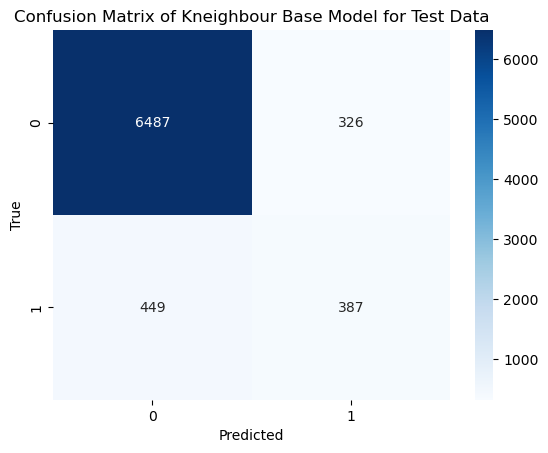

In [113]:
sns.heatmap(confusion_matrix_base_model_kneighbour, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of Kneighbour Base Model for Test Data")
plt.show()

### Baseline Model on Support Vector Machine

In [115]:
# Support Vector Machine
from sklearn.svm import SVC

base_svm_classifier = SVC(kernel='linear', random_state=42)
start_time = time.time()  # Start the timer
svm = base_svm_classifier.fit(X_train, y_train)
y_pre_svm = svm.predict(X_test)
train_time_svm = time.time() - start_time  # Calculate train time
train_acc_svm = accuracy_score(y_train, svm.predict(X_train))  # Train accuracy
test_acc_svm = accuracy_score(y_test, y_pre_svm)  # Test accuracy
results.append(['Support Vector Machine', train_time_svm, train_acc_svm, test_acc_svm])

confusion_matrix_base_model_svm = confusion_matrix(y_test, y_pre_svm)
print (confusion_matrix_base_model_svm)
print (classification_report(y_test,y_pre_svm))

precision_svm = precision_score(y_test, y_pre_svm)

# After evaluation, print the best precision
print(f"Precision for Support Vector Machine Base model on Test Data: {precision_svm}")

[[6523  290]
 [ 441  395]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6813
           1       0.58      0.47      0.52       836

    accuracy                           0.90      7649
   macro avg       0.76      0.71      0.73      7649
weighted avg       0.90      0.90      0.90      7649

Precision for Support Vector Machine Base model on Test Data: 0.5766423357664233


**Confusion Matrix to review Support Vector Machine base model performance.**

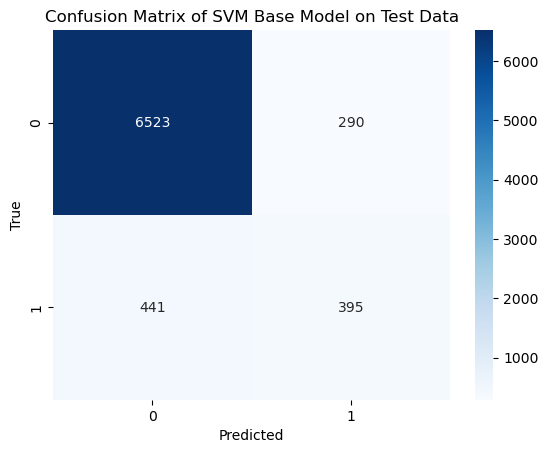

In [116]:
sns.heatmap(confusion_matrix_base_model_svm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of SVM Base Model on Test Data")
plt.show()

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

### Baseline Model on Logistic Regression

In [119]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg_base_model = LogisticRegression(max_iter=200, solver='newton-cg')
start_time = time.time()  # Start the timer
log_reg_base_model.fit(X_train, y_train) # Train the model
y_pred_log_reg = log_reg_base_model.predict(X_test)
train_time_log_reg = time.time() - start_time  # Calculate train time
train_acc_log_reg = accuracy_score(y_train, log_reg_base_model.predict(X_train))  # Train accuracy
test_acc_log_reg = accuracy_score(y_test, y_pred_log_reg)  # Test accuracy

results.append(['Logistic Regression', train_time_log_reg, train_acc_log_reg, test_acc_log_reg])

confusion_matrix_base_model_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print (confusion_matrix_base_model_log_reg)
print (classification_report(y_test,y_pred_log_reg))

precision_log_reg = precision_score(y_test, y_pred_log_reg)

# After evaluation, print the best precision
print(f"Precision for Logistic Regression base model on test data: {precision_log_reg}")

[[6660  153]
 [ 490  346]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      6813
           1       0.69      0.41      0.52       836

    accuracy                           0.92      7649
   macro avg       0.81      0.70      0.74      7649
weighted avg       0.91      0.92      0.91      7649

Precision for Logistic Regression base model on test data: 0.6933867735470942


**Confusion Matrix to review Logistic Regression base model performance.**

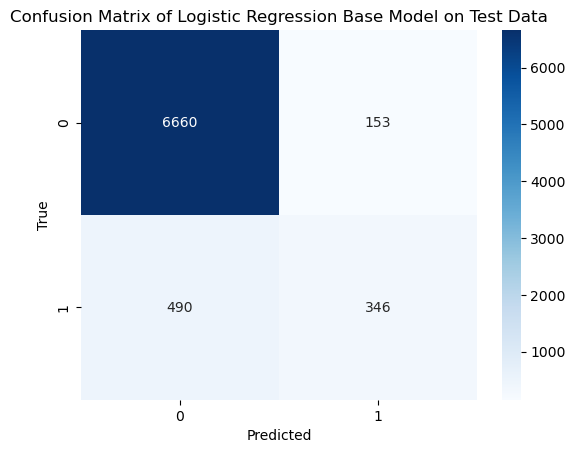

In [121]:
sns.heatmap(confusion_matrix_base_model_log_reg, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of Logistic Regression Base Model on Test Data")
plt.show()

### Problem 9: Score the Model

What is the accuracy of your model?

**We can view the accuracy of all base models used here. From the result we can find that accuracy for Logistic Regression is highest compared to other models accuracy.** 

In [123]:
print("Accuracy for Logistic Regression:", accuracy_score(y_test, y_pred_log_reg))
print("Accuracy for KNN Neighbour:", accuracy_score(y_test, y_pre_knn))
print("Accuracy for Decision Tree:", accuracy_score(y_test, y_pre_dt))
print("Accuracy for Support Vector Machine:", accuracy_score(y_test, y_pre_svm))

Accuracy for Logistic Regression: 0.9159367237547392
Accuracy for KNN Neighbour: 0.8986795659563341
Accuracy for Decision Tree: 0.9054778402405543
Accuracy for Support Vector Machine: 0.9044319518891358


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

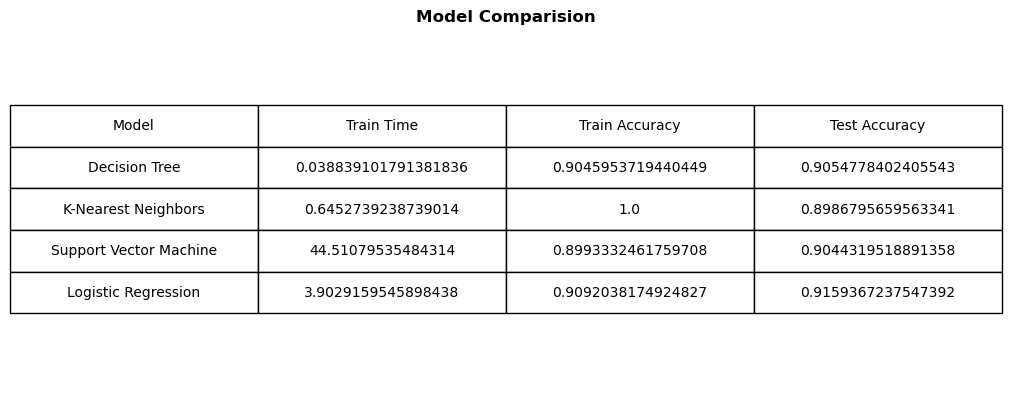

In [125]:
# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])

# Display the results
# Create a figure and an axes
fig, ax = plt.subplots()

# Hide axes
ax.axis('off')

# Create table
table = ax.table(
    cellText=results_df.values,
    colLabels=results_df.columns,
    cellLoc='center',
    loc='center'
)

# Adjust table properties (optional)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(2, 2.5)

# Display the table
plt.title('Model Comparision', fontweight='bold', pad=-50)
plt.show()


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Feature Engineering and Exploration

Feature engineering is crucial to improving the performance of a model. This includes selecting the right features, transforming existing ones, and removing irrelevant or noisy features. Below are steps for feature engineering:

- Feature Selection: Keep or Remove Irrelevant Features:

- Gender Feature: The Gender feature has been removed from the original dataset, as indicated in the dataset documentation (CRISP-DM-BANK.pdf). This decision was based on the observation that the success rates for male and female clients were nearly identical, rendering the gender attribute irrelevant for predicting the target variable.


### **Hyperparameter tunning for Decision Tree**

In [39]:
#Classification using Decision Tree Classifier parameter tuning
#Using for loop iteration to find best precision for this model
from sklearn.tree import DecisionTreeClassifier

bestprecision = 0
bestk = 0
bestp = 0


for a in range (2, 5+1):
    for b in range (2, 5+1):
        for c in range (1, 5+1):
            decision_classifier = DecisionTreeClassifier(criterion='gini', max_depth=a, min_samples_split=b, min_samples_leaf=c, max_features=None, max_leaf_nodes=None)
            decision_classifier_fit = decision_classifier.fit(X_train, y_train)
            y_pre_decision = decision_classifier_fit.predict(X_test)
          
            confusion_matrix_decision_1 = confusion_matrix(y_test, y_pre_decision)
            print ("max depth = " + str(a) + " min samples split = " + str(b) + "min samples leaf =" + str(c))
            print (confusion_matrix_decision_1)
            print (classification_report(y_test,y_pre_decision))
            
            precision = round(float(confusion_matrix_decision_1.item(3))/float((confusion_matrix_decision_1.item(1)+confusion_matrix_decision_1.item(3))),2)
            
            if(precision > bestprecision):
                bestprecision = precision
                besta = a
                bestb = b
                bestc = c

# After all iterations, print the best precision, k, and p
print(f"Best Precision: {bestprecision}")
print(f"Best Max Depth: {besta}")
print(f"Best Min Samples split: {bestb}")  
print(f"Best Min Samples leaf: {bestc}")  

max depth = 2 min samples split = 2min samples leaf =1
[[7050  269]
 [ 523  396]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7319
           1       0.60      0.43      0.50       919

    accuracy                           0.90      8238
   macro avg       0.76      0.70      0.72      8238
weighted avg       0.89      0.90      0.90      8238

max depth = 2 min samples split = 2min samples leaf =2
[[7050  269]
 [ 523  396]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7319
           1       0.60      0.43      0.50       919

    accuracy                           0.90      8238
   macro avg       0.76      0.70      0.72      8238
weighted avg       0.89      0.90      0.90      8238

max depth = 2 min samples split = 2min samples leaf =3
[[7050  269]
 [ 523  396]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95  

From the parameter tunning to find best precision on decision tree. From the result we can look at the best model performance.
- **Best Decision Tree Precision: 0.66**
- **Best Decision Tree Max Depth: 5**
- **Best Decision Tree Min Samples split: 2**
- **Best Decision Tree Min Samples leaf: 1**

Classification Report of Best Decision Tree. 

In [41]:
#performance of the best model 80%TRAIN 20%TEST Desc Tree
from sklearn.metrics import accuracy_score
clf_dt_1 = DecisionTreeClassifier(criterion='gini', max_depth=besta, min_samples_split=bestb, min_samples_leaf=bestc, max_features=None, max_leaf_nodes=None)
fit = clf_dt_1.fit(X_train, y_train)
y_pre_clf_dt = fit.predict(X_test)
confusion_matrix_data_dt_1 = confusion_matrix(y_test, y_pre_clf_dt)

print ("Confusion Matrix for Best Decision Tree: ")

print (confusion_matrix_data_dt_1 )

print ("Accuracy : " )

print (round(accuracy_score(y_test,y_pre_clf_dt),3))

print (classification_report(y_test,y_pre_clf_dt))

Confusion Matrix for Best Decision Tree: 
[[7053  266]
 [ 397  522]]
Accuracy : 
0.92
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      7319
           1       0.66      0.57      0.61       919

    accuracy                           0.92      8238
   macro avg       0.80      0.77      0.78      8238
weighted avg       0.91      0.92      0.92      8238



**Confusion Matrix of Decision Tree Best Model**

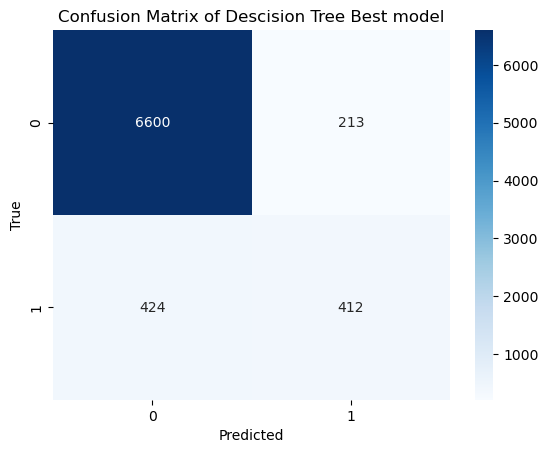

In [131]:
sns.heatmap(confusion_matrix_data_dt_1 , annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of Descision Tree Best model")
plt.show()

**K-Fold Cross Validation to review the performance of best parameter on Decison Tree**

In [133]:
#K-Folds Cross Validation using the best k and p for Desc Tree 20%Test
from sklearn.model_selection import KFold
kf = KFold (n_splits=5, random_state=4, shuffle=True)

for train_index, test_index in kf.split (bank_filtered_df) :
    print("TRAIN :", train_index, "TEST: ", test_index)
    X_train, X_test = bank_filtered_df.values[train_index], bank_filtered_df.values[test_index]
    y_train, y_test = bank_filtered_target_df.values[train_index], bank_filtered_target_df.values[test_index]
    
for k, (train_index, test_index) in enumerate(kf.split(bank_filtered_df)):
    X_train, X_test = bank_filtered_df.values[train_index], bank_filtered_df.values[test_index]
    y_train, y_test = bank_filtered_target_df.values[train_index], bank_filtered_target_df.values[test_index]
    clf_dt_1.fit(X_train, y_train)
     # Predict and evaluate
    y_pred = clf_dt_1.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print fold score
    print ("[fold {0}] score: {1:.5f}".format(k, clf_dt_1.score(X_test, y_test)))

TRAIN : [    1     2     3 ... 38240 38242 38244] TEST:  [    0    19    22 ... 38224 38241 38243]
TRAIN : [    0     1     2 ... 38242 38243 38244] TEST:  [    4     7     9 ... 38223 38227 38230]
TRAIN : [    0     1     2 ... 38241 38242 38243] TEST:  [    3     5     6 ... 38239 38240 38244]
TRAIN : [    0     2     3 ... 38241 38243 38244] TEST:  [    1    15    17 ... 38235 38238 38242]
TRAIN : [    0     1     3 ... 38242 38243 38244] TEST:  [    2    21    27 ... 38228 38232 38236]
[fold 0] score: 0.91437
[fold 1] score: 0.91881
[fold 2] score: 0.91371
[fold 3] score: 0.91254
[fold 4] score: 0.91306


**It can be found that K fold 1 has best score for the decision tree with value: 0.91881 .** 

**GridSearch Cross Validation for Decision Tree**

In [43]:
from sklearn.model_selection import GridSearchCV
#GridSearch CV results for all models. 

grid_search_results = []

# Example for Decision Tree
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search_decision_tree = GridSearchCV(DecisionTreeClassifier(criterion='gini',max_features=None, max_leaf_nodes=None), param_grid, cv=5)
grid_search_decision_tree.fit(X_train, y_train)

# Get the best model
best_model_dt = grid_search_decision_tree.best_estimator_

# Make predictions using the best model
y_pred_grid_search_dt = best_model_dt.predict(X_test)

# Evaluate accuracy
accuracy_grid_search_dt = accuracy_score(y_test, y_pred_grid_search_dt)

print("Best Parameters:", grid_search_decision_tree.best_params_)

grid_search_results.append(['Decision Tree', accuracy_grid_search_dt])

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


**From the GridsearchCV result for Decision Tree, we can also find that the best parameters for decision tree are: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}**

### **Hyperparameter tunning for KNearest Neighbour Clasification**

In [137]:
#KNearest Neighbour Clasification

#selecting the best attribute k and p using iteration

from sklearn.neighbors import KNeighborsClassifier

bestprecision = 0  # Initializing the best precision as 0
bestk = 0          # Initializing the best k (number of neighbors)
bestp = 0          # Initializing the best p (Minkowski distance parameter)

for k in range (1, 15+1):
    for i in range (1, 3+1):
        kNeighbour_clf = KNeighborsClassifier(n_neighbors = k, weights='distance', metric='minkowski', p=i)
        kNeighbour_clf_fit = kNeighbour_clf.fit(X_train, y_train)
        y_pre_knn_clf_fit = kNeighbour_clf_fit.predict(X_test)
        #from sklearn.metrics import confusion_matrix
        confusion_matrix_data_knn_1 = confusion_matrix(y_test, y_pre_knn_clf_fit)
        print ("k = " + str(k) + " p = " + str(i))
        print (confusion_matrix_data_knn_1)
        print (classification_report(y_test,y_pre_knn_clf_fit))
        
        precision = round(float(confusion_matrix_data_knn_1.item(3))/float((confusion_matrix_data_knn_1.item(1)+confusion_matrix_data_knn_1.item(3))),2)
        if(precision > bestprecision):
            bestprecision = precision
            bestk = k
            bestp = i

# After all iterations, print the best precision, k, and p
print(f"Best Precision for KNN: {bestprecision}")
print(f"Best k for KNN: {bestk}")
print(f"Best p for KNN: {bestp}")
        

k = 1 p = 1
[[6356  410]
 [ 445  438]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      6766
           1       0.52      0.50      0.51       883

    accuracy                           0.89      7649
   macro avg       0.73      0.72      0.72      7649
weighted avg       0.89      0.89      0.89      7649

k = 1 p = 2
[[6342  424]
 [ 467  416]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      6766
           1       0.50      0.47      0.48       883

    accuracy                           0.88      7649
   macro avg       0.71      0.70      0.71      7649
weighted avg       0.88      0.88      0.88      7649

k = 1 p = 3
[[6345  421]
 [ 473  410]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      6766
           1       0.49      0.46      0.48       883

    accuracy                           0.88      7649
   macro av

From the parameter tunning to find best precision on KNeighbour. From the result we can look at the best model performance.
- **Best KNeighbour Precision: 0.64**
- **Best KNeighbour  Nearest Neighbors: 13**
- **Best KNeighbour Type of Distance Measurement: 1 (Manhattan)**

In [138]:
#performance of the best model 80%TRAIN 20%TEST KNeighbour Tree
from sklearn.metrics import accuracy_score
clf_knn_1 = KNeighborsClassifier(n_neighbors = bestk, weights='distance', metric='minkowski', p=bestp)
fit = clf_knn_1.fit(X_train, y_train)
y_pre_clf_knn_1 = fit.predict(X_test)
confusion_matrix_data_knn_2 = confusion_matrix(y_test, y_pre_clf_knn_1)

print ("Confusion Matrix for Best KNeighbour: ")

print (confusion_matrix_data_knn_2)

print ("Accuracy : " )

print (round(accuracy_score(y_test,y_pre_clf_knn_1),3))

print (classification_report(y_test,y_pre_clf_knn_1))

Confusion Matrix for Best KNeighbour: 
[[6515  251]
 [ 438  445]]
Accuracy : 
0.91
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6766
           1       0.64      0.50      0.56       883

    accuracy                           0.91      7649
   macro avg       0.79      0.73      0.76      7649
weighted avg       0.90      0.91      0.91      7649



**Confusion Matrix of KNN Best Model**

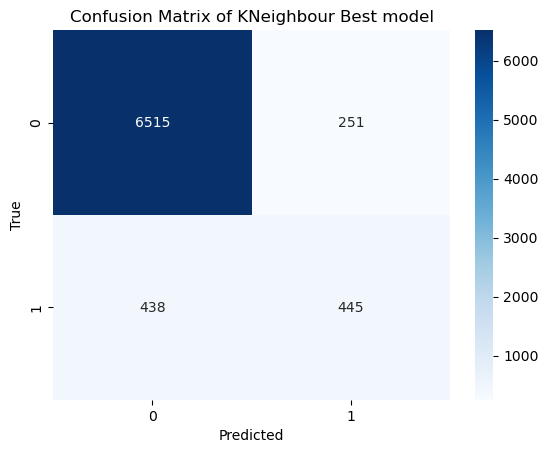

In [141]:
sns.heatmap(confusion_matrix_data_knn_2 , annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of KNeighbour Best model")
plt.show()

**K-Fold Cross Validation to review the performance of best parameter on KNeighbour**

In [143]:
#K-Folds Cross Validation using the best k and p for KNeighbour 20%Test
from sklearn.model_selection import KFold
kf = KFold (n_splits=5, random_state=4, shuffle=True)

for train_index, test_index in kf.split (bank_filtered_df) :
    print("TRAIN :", train_index, "TEST: ", test_index)
    X_train, X_test = bank_filtered_df.values[train_index], bank_filtered_df.values[test_index]
    y_train, y_test = bank_filtered_target_df.values[train_index], bank_filtered_target_df.values[test_index]
    
for k, (train_index, test_index) in enumerate(kf.split(bank_filtered_df)):
    X_train, X_test = bank_filtered_df.values[train_index], bank_filtered_df.values[test_index]
    y_train, y_test = bank_filtered_target_df.values[train_index], bank_filtered_target_df.values[test_index]
    clf_knn_1.fit(X_train, y_train)
     # Predict and evaluate
    y_pred = clf_knn_1.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print fold score
    print ("[fold {0}] score: {1:.5f}".format(k, clf_knn_1.score(X_test, y_test)))

TRAIN : [    1     2     3 ... 38240 38242 38244] TEST:  [    0    19    22 ... 38224 38241 38243]
TRAIN : [    0     1     2 ... 38242 38243 38244] TEST:  [    4     7     9 ... 38223 38227 38230]
TRAIN : [    0     1     2 ... 38241 38242 38243] TEST:  [    3     5     6 ... 38239 38240 38244]
TRAIN : [    0     2     3 ... 38241 38243 38244] TEST:  [    1    15    17 ... 38235 38238 38242]
TRAIN : [    0     1     3 ... 38242 38243 38244] TEST:  [    2    21    27 ... 38228 38232 38236]
[fold 0] score: 0.91175
[fold 1] score: 0.91319
[fold 2] score: 0.90979
[fold 3] score: 0.90692
[fold 4] score: 0.90992


**We can see that K-fold 0 has highest score for KNeighbour with value: 0.91175**

**GridSearch Cross Validation for KNN Classifier**

In [47]:
#  Kneighbour
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'p': [1, 2]  # 1 is for Manhattan distance, 2 is for Euclidean distance
}

grid_search_KNeighbour = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search_KNeighbour.fit(X_train, y_train)

print("Best Parameters:", grid_search_KNeighbour.best_params_)

best_model_knn = grid_search_KNeighbour.best_estimator_

# Make predictions using the best model
y_pred_grid_search_knn = best_model_knn.predict(X_test)

# Evaluate accuracy
accuracy_grid_search_knn = accuracy_score(y_test, y_pred_grid_search_knn)

print("Accuray:", accuracy_grid_search_knn)

grid_search_results.append(['KNeighbour', accuracy_grid_search_knn])

Best Parameters: {'metric': 'minkowski', 'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}
Accuray: 0.9157562515173586


**From the GridsearchCV result for KNN Classifier, we can also find that the best parameters are {'metric': 'minkowski', 'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}**

**GridSearch Cross Validation for Logistic Regression**

In [51]:
from sklearn.linear_model import LogisticRegression
#GridSearch CV for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear'],  # Optimization algorithms
    'max_iter': [500, 1000]  # Maximum iterations for convergence
}

log_reg_grid_cv = LogisticRegression()
grid_search_log_reg = GridSearchCV(estimator=log_reg_grid_cv, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_log_reg.fit(X_train, y_train)

print("Best Parameters:", grid_search_log_reg.best_params_)

best_model_log_reg = grid_search_log_reg.best_estimator_

# Make predictions using the best model
y_pred_grid_search_log_reg = best_model_log_reg.predict(X_test)

# Evaluate accuracy
accuracy_grid_search_log_reg = accuracy_score(y_test, y_pred_grid_search_log_reg)

print("Accuray:", accuracy_grid_search_log_reg)

grid_search_results.append(['Logistic Regression', accuracy_grid_search_log_reg])

Best Parameters: {'C': 10, 'max_iter': 500, 'solver': 'liblinear'}
Accuray: 0.9139354212187424


**From the GridsearchCV result for logistic regression, we can also find that the best parameters are {'C': 0.01, 'max_iter': 500, 'solver': 'liblinear'}**

**GridSearch Cross Validation for Support Vector Machine**

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
# Define the parameter grid to tune
param_grid = {
    'C': [0.01, 0.1],  # Regularization strength
    'kernel': ['linear', 'rbf'],  # Kernel types
    'gamma': ['scale', 'auto'],  # Gamma values (only relevant for 'rbf', 'poly' kernels)
    'degree': [3, 4],  # Degree of polynomial kernel (only used with 'poly')
}

print(param_grid)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM model
svm = SVC()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the scaled training data
grid_search_svm.fit(X_train_scaled, y_train)

# Output the best parameters and the best score
print("Best Parameters:", grid_search_svm.best_params_)
print("Best Cross-Validation Accuracy: {:.5f}".format(grid_search_svm.best_score_))

# Evaluate on the test data
test_score = grid_search_svm.score(X_test_scaled, y_test)
print("Test Score: {:.5f}".format(test_score))

best_model_svm = grid_search_svm.best_estimator_

# Make predictions using the best model
y_pred_grid_search_svm = best_model_svm.predict(X_test)

# Evaluate accuracy
accuracy_grid_search_svm = accuracy_score(y_test, y_pred_grid_search_svm)

print("Test Accuray:", accuracy_grid_search_svm)

grid_search_results.append(['Support Vector Machine', accuracy_grid_search_svm])

{'C': [0.01, 0.1], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto'], 'degree': [3, 4]}
Best Parameters: {'C': 0.1, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.90261
Test Score: 0.90677
Test Accuray: 0.888443797038116


**From the GridsearchCV result for SVM model, we can also find that the best parameters are: {'C': 0.1, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}** 

In [ ]:
###Models Comparison After Improvement

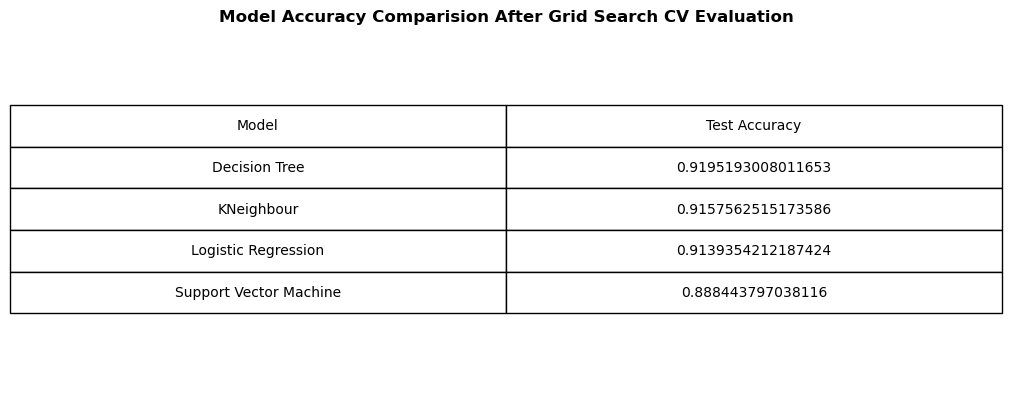

In [66]:
# Create a DataFrame to display the results
grid_search_results_df = pd.DataFrame(grid_search_results, columns=['Model', 'Test Accuracy'])

#Finalize the dataframe and avoid any duplicate entry.
grid_search_results_df = grid_search_results_df.drop_duplicates()

# Display the results
# Create a figure and an axes
fig, ax = plt.subplots()


# Hide axes
ax.axis('off')

# Create table
table = ax.table(
    cellText=grid_search_results_df.values,
    colLabels=grid_search_results_df.columns,
    cellLoc='center',
    loc='center'
)

# Adjust table properties (optional)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(2, 2.5)

# Display the table
plt.title('Model Accuracy Comparision After Grid Search CV Evaluation', fontweight='bold', pad=-50)
plt.show()

**From the model comparison we can find that with the result of GridSearch, the best parameters for Decision Tree are: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} with highest test accuracy.**  